# Additional Libraries

In [ ]:
!pip install prince
!pip install minisom
!pip install pyclustering
!pip install umap-learn

  Created wheel for minisom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=68c6bbdefbad532176a65b8f956daf035774b30d76a74790db619ec09e4d75a4
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built minisom
     |████████████████████████████████| 2.6MB 4.2MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp36-none-any.whl size=2395106 sha256=efcb22e794f85fd0ffcfd92485e925634d990bdd08aa4d1dc35c80305e322567
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


# Imports

In [ ]:
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from ipywidgets import interact
from matplotlib.patches import Ellipse
from matplotlib.gridspec import GridSpec

from scipy.special import entr
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.compose import ColumnTransformer

import prince
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
import umap
from minisom import MiniSom

from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import MeanShift
from pyclustering.cluster.kmedoids import kmedoids
from google.colab import files
import io

In [ ]:
def plot_dendrogram(model, **kwargs):
    """
    A basic function for plotting a dendrogram. Sourced from the following link:
    https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
    
    Parameters:
        model (object of class sklearn.cluster.hierarchical.AgglomerativeClustering): a fitted scikit-learn hierarchical clustering model.
    
    Output: a dendrogram based on the model based in the parameters.
    
    Returns: N/A    
    """
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Data

## Import data

### Import for Google Colab

In [ ]:
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "WA_Fn-UseC_-Telco-Customer-Churn.csv" with length 977501 bytes


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv'].decode('utf-8')))  

### Import for Jupyter Notebook

In [ ]:
# data = pd.read_csv("C:/Users/Juss/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Observe general data/column information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values


    return summary

In [ ]:
resumetable(data)

Dataset Shape: (7043, 21)


Name   dtypes  Missing  Uniques       First Value  Second Value
0         customerID   object        0     7043        7590-VHVEG    5575-GNVDE
1             gender   object        0        2            Female          Male
2      SeniorCitizen    int64        0        2                 0             0
3            Partner   object        0        2               Yes            No
4         Dependents   object        0        2                No            No
5             tenure    int64        0       73                 1            34
6       PhoneService   object        0        2                No           Yes
7      MultipleLines   object        0        3  No phone service            No
8    InternetService   object        0        3               DSL           DSL
9     OnlineSecurity   object        0        3                No           Yes
10      OnlineBackup   object        0        3               Yes            No
11  DeviceProtection   object        0        3                No           Yes
12       TechSupport   object        0        3                No            No
13       StreamingTV   object        0        3                No            No
14   StreamingMovies   object        0        3                No            No
15          Contract   object        0        3    Month-to-month      One year
16  PaperlessBilling   object        0        2               Yes            No
17     PaymentMethod   object        0        4  Electronic check  Mailed check
18    MonthlyCharges  float64        0     1585             29.85         56.95
19      TotalCharges   object        0     6531             29.85        1889.5
20             Churn   object        0        2                No            No

In [ ]:
data.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

## Adjusting values and column dtypes

### Reassign columns

In [ ]:
print(data.SeniorCitizen.value_counts())
data.loc[data['SeniorCitizen'] == 0, 'SeniorCitizen'] = 'No'
data.loc[data['SeniorCitizen'] == 1, 'SeniorCitizen'] = 'Yes'
print(data.SeniorCitizen.value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Initial Null Check

In [ ]:
data.isnull().sum()*100/data.isnull().count()

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [ ]:
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
data.reset_index(inplace=True)

(7043, 21)
(7032, 21)


## Data 2: Tiering (Tenure, Monthly Charges, Total Charges)

In [ ]:
data2 = data.copy()

In [ ]:
def tier(n):
    if n <= 32.38:
        return 'low'
    elif n <= 64.76: 
        return 'medium'
    elif n <= 97.14:
        return 'high'
    else:
        return 'very-high'

data2['MonthlyCharges'] = data2['MonthlyCharges'].apply(lambda x: tier(x))

In [ ]:
def tier(n):
    if n <= 1141.65:
        return 'low'
    elif n <= 2283.30: 
        return 'medium'
    elif n <= 3424.95:
        return 'high'
    else:
        return 'very-high'

data2['TotalCharges'] = data2['TotalCharges'].apply(lambda x: tier(x))

In [ ]:
def tier(n):
    if n <= 16:
        return 'low'
    elif n <= 32: 
        return 'medium'
    elif n <= 48:
        return 'high'
    else:
        return 'very-high'

data2['tenure'] = data2['tenure'].apply(lambda x: tier(x))

In [ ]:
data2.drop(columns=['index','customerID'], inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   object
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   tenure            7032 non-null   object
 5   PhoneService      7032 non-null   object
 6   MultipleLines     7032 non-null   object
 7   InternetService   7032 non-null   object
 8   OnlineSecurity    7032 non-null   object
 9   OnlineBackup      7032 non-null   object
 10  DeviceProtection  7032 non-null   object
 11  TechSupport       7032 non-null   object
 12  StreamingTV       7032 non-null   object
 13  StreamingMovies   7032 non-null   object
 14  Contract          7032 non-null   object
 15  PaperlessBilling  7032 non-null   object
 16  PaymentMethod     7032 non-null   object
 17  MonthlyCharges

## Visualize features 

### Data 1: Feature Visualization

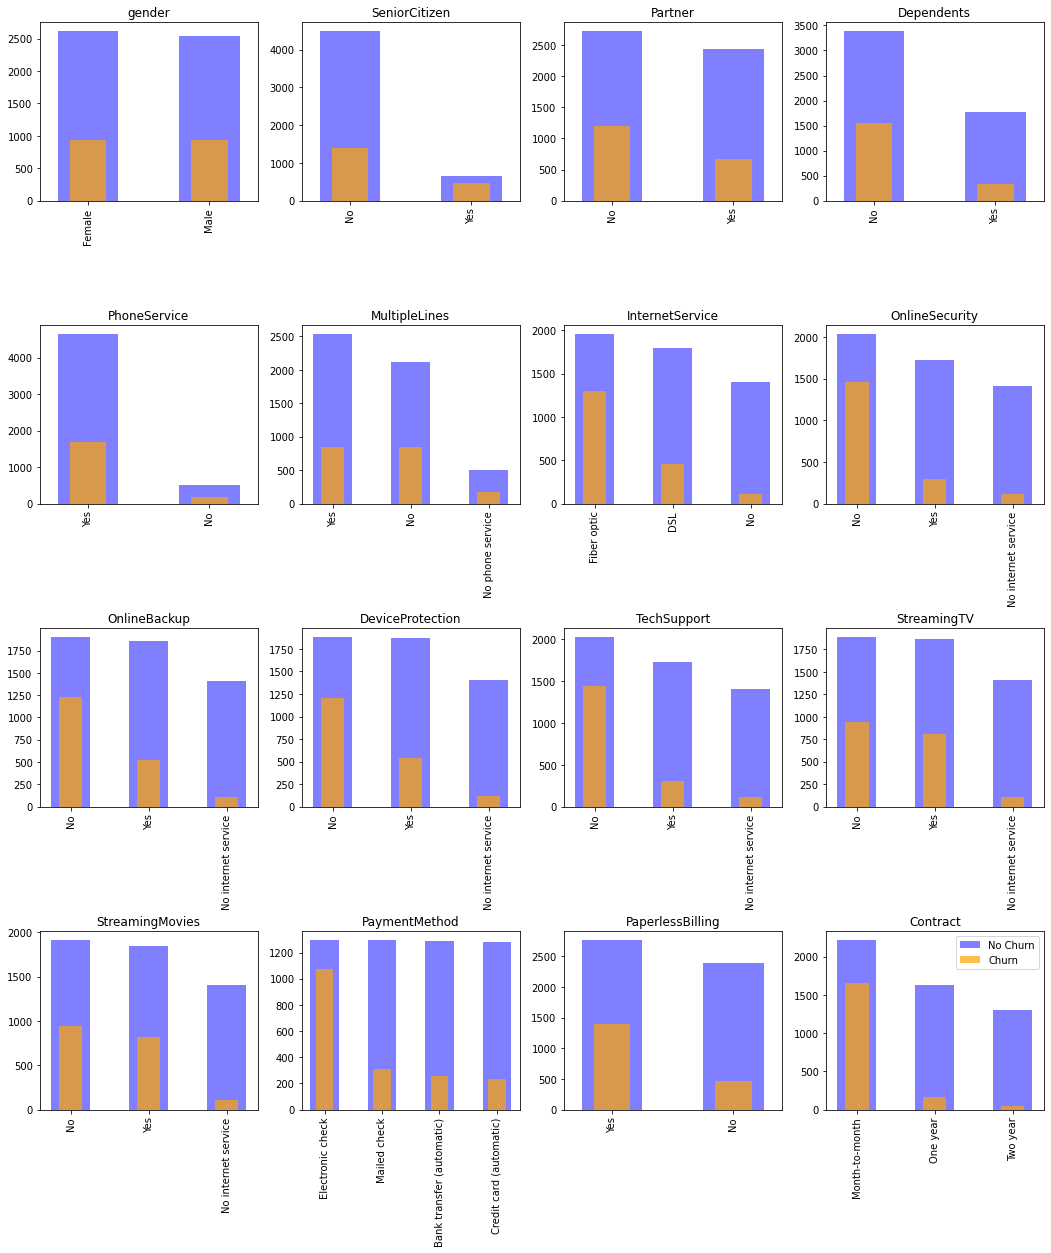

In [ ]:
categorical_features = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod',
 'PaperlessBilling',
 'Contract' ]

ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[data.Churn=='No'][categorical_feature].value_counts().plot(kind='bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    data[data.Churn=='Yes'][categorical_feature].value_counts().plot(kind='bar', 
                width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

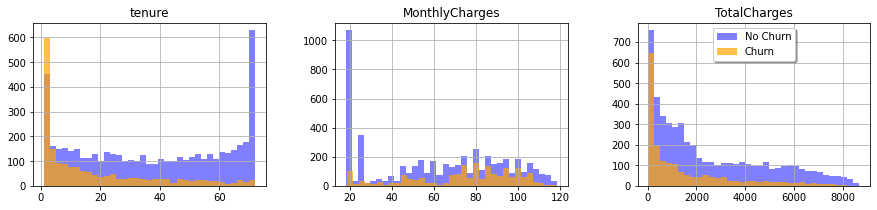

In [ ]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
data[data.Churn == "No"][num_cols].hist(bins=35, color="blue", alpha=0.5, ax=ax)
data[data.Churn == "Yes"][num_cols].hist(bins=35, color="orange", alpha=0.7, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

### Data 2: Tiered Visualizations

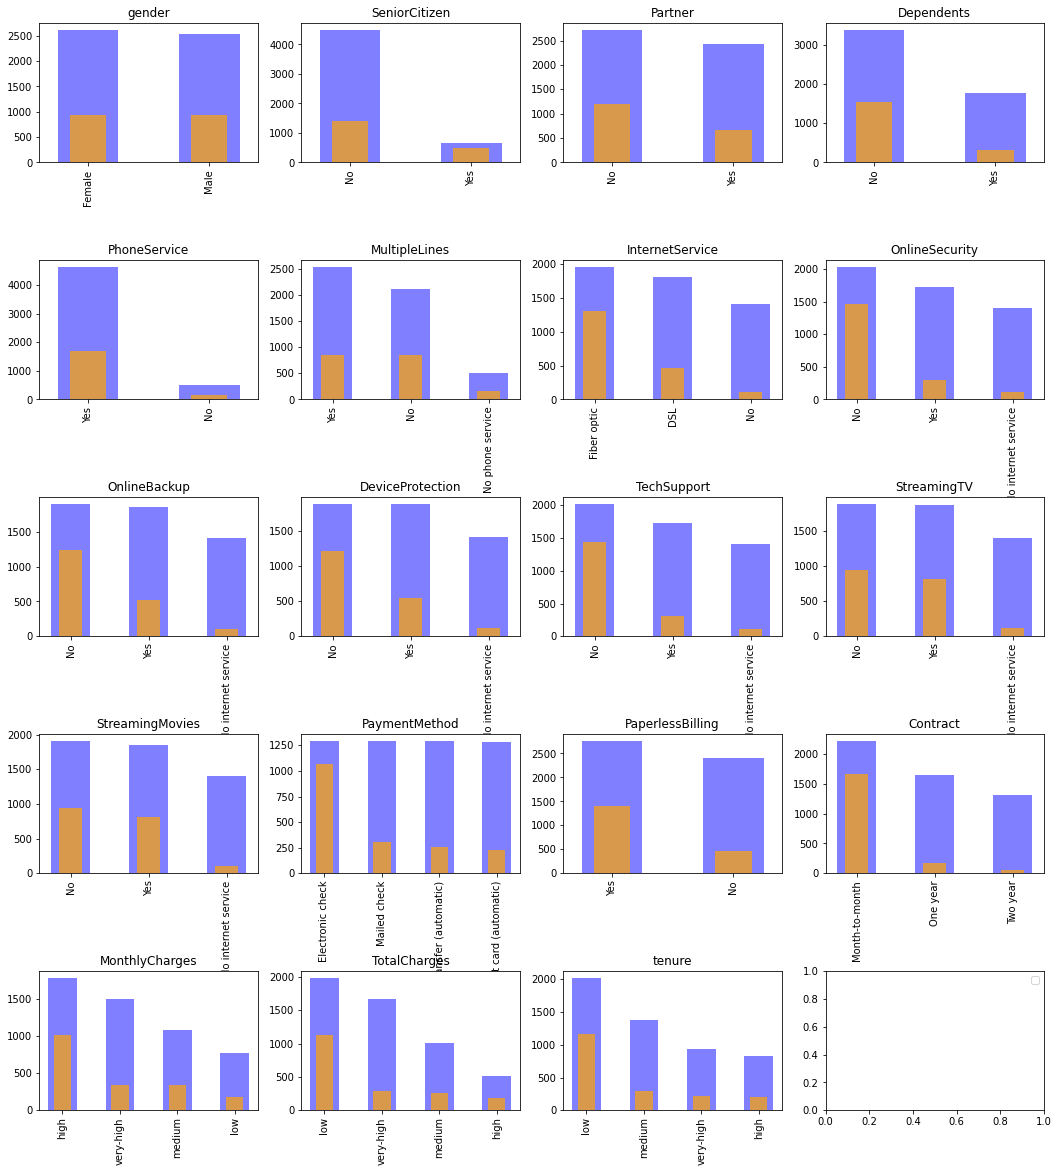

In [ ]:
categorical_features1 = [
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod',
 'PaperlessBilling',
 'Contract',
 'MonthlyCharges',
 'TotalCharges',
 'tenure'
  ]

ROWS, COLS = 5, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features1):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data2[data2.Churn=='No'][categorical_feature].value_counts().plot(kind='bar', 
                width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    data2[data2.Churn=='Yes'][categorical_feature].value_counts().plot(kind='bar', 
                width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

## Encoding catagorical variables

### Encode Data 1

In [ ]:
encode = data.drop(columns=['index','customerID','tenure','MonthlyCharges','TotalCharges','Churn'])
encode.dtypes

gender              object
SeniorCitizen       object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

In [ ]:
encode.describe()

gender SeniorCitizen  ... PaperlessBilling     PaymentMethod
count    7032          7032  ...             7032              7032
unique      2             2  ...                2                 4
top      Male            No  ...              Yes  Electronic check
freq     3549          5890  ...             4168              2365

[4 rows x 16 columns]

In [ ]:
one_hot = OHE(sparse=False)
onehot = pd.DataFrame(one_hot.fit_transform(encode))

In [ ]:
data_encode = pd.concat([data,onehot],axis=1)

In [ ]:
data_encode.dropna(inplace=True)

In [ ]:
toss = ['index',
        'customerID',
        'gender',
        'SeniorCitizen',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        ]

data_encode.drop(columns=toss, inplace=True)

In [ ]:
data_encode.shape

(7032, 47)

### Encode Data 2

In [ ]:
encode2 = data2.drop(columns=['Churn'])

In [ ]:
encode2.describe()

gender SeniorCitizen  ... MonthlyCharges TotalCharges
count    7032          7032  ...           7032         7032
unique      2             2  ...              4            4
top      Male            No  ...           high          low
freq     3549          5890  ...           2805         3121

[4 rows x 19 columns]

In [ ]:
one_hot2 = OHE(sparse=False)
onehot2 = pd.DataFrame(one_hot2.fit_transform(encode2))

In [ ]:
data_encode2 = pd.concat([data2,onehot2],axis=1)

In [ ]:
data_encode2.dropna(inplace=True)

In [ ]:
toss2 = ['gender',
        'SeniorCitizen',
        'tenure',
        'Partner',
        'Dependents',
        'PhoneService',
        'MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaperlessBilling',
        'PaymentMethod',
        'MonthlyCharges',
        'TotalCharges'
        ]
data_encode2.drop(columns=toss2, inplace=True)

In [ ]:
data_encode2.shape

(7032, 56)

## Final Null Check

In [ ]:
data_encode.isnull().sum()*100/data_encode.isnull().count()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
Churn             0.0
0                 0.0
1                 0.0
2                 0.0
3                 0.0
4                 0.0
5                 0.0
6                 0.0
7                 0.0
8                 0.0
9                 0.0
10                0.0
11                0.0
12                0.0
13                0.0
14                0.0
15                0.0
16                0.0
17                0.0
18                0.0
19                0.0
20                0.0
21                0.0
22                0.0
23                0.0
24                0.0
25                0.0
26                0.0
27                0.0
28                0.0
29                0.0
30                0.0
31                0.0
32                0.0
33                0.0
34                0.0
35                0.0
36                0.0
37                0.0
38                0.0
39                0.0
40                0.0
41        

In [ ]:
data_encode2.isnull().sum()*100/data_encode2.isnull().count()

Churn    0.0
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
dtype: float64

## Splitting off target

In [ ]:
X = data_encode.drop(columns='Churn')
y = data_encode.Churn
print(X.shape)
print(y.shape)

(7032, 46)
(7032,)


In [ ]:
X2 = data_encode2.drop(columns='Churn')
y2 = data_encode2.Churn
print(X2.shape)
print(y2.shape)

(7032, 55)
(7032,)


## Scaling

In [ ]:
scale = MinMaxScaler(feature_range=(0,1))
scaled = scale.fit_transform(X)

In [ ]:
scaled.shape

(7032, 46)

# Data1: Dimensionality Reduction

## PCA

In [ ]:
pca = PCA(n_components=2)
pca_ = pd.DataFrame(pca.fit_transform(scaled), index=X.index)

In [ ]:
print(pca.explained_variance_ratio_)

[0.23359443 0.13389599]


In [ ]:
fig = px.scatter(pca_, x=0, y=1, color=y)
fig.show()

In [ ]:
pcaline = PCA(n_components=25)
pcaline.fit(scaled)
exp_var_cum = np.cumsum(pcaline.explained_variance_ratio_)

In [ ]:
px. area(
    x=range(1, 26),
    y=exp_var_cum,
    labels={'x': 'Number of components', 'y':'Explained variance'}
)

## MCA

In [ ]:
data_cat = data.drop(columns=['index','customerID','Churn'])

In [ ]:
mca = prince.MCA(
    n_components=2,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
mca_ = mca.fit_transform(data_cat)

In [ ]:
mca.total_inertia_

1.4210526315789473

In [ ]:
mca.explained_inertia_

[0.05791983685675762, 0.023361880671491832]

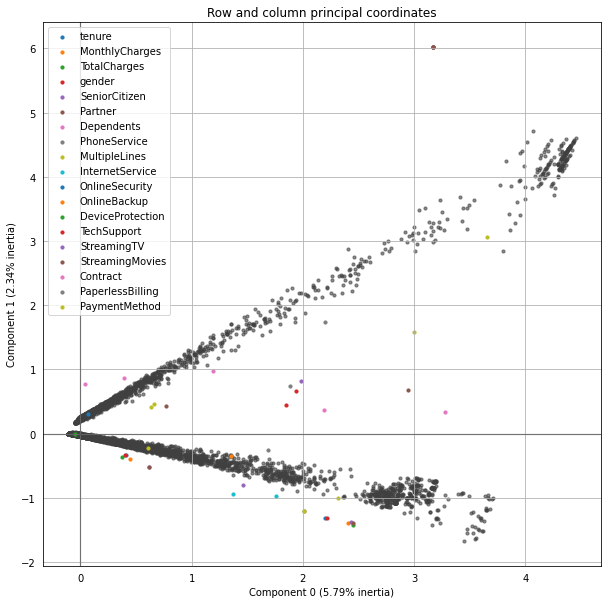

In [ ]:
ax2 = mca.plot_coordinates(
    X=data_cat,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size = 10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size= 10,
    show_column_labels=False
    
)

In [ ]:
mca1 = prince.MCA(
    n_components=20,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
mca1_ = mca1.fit_transform(data_cat)

In [ ]:
mca1.total_inertia_

1.4210526315789473

In [ ]:
mca1.explained_inertia_

[0.05791983685675762,
 0.02336188067149187,
 0.005344249431415644,
 0.0030294332667707654,
 0.0019047579192218906,
 0.0017013465365135956,
 0.001474011102648801,
 0.0013118861918629285,
 0.001252444048151073,
 0.0010693061640245098,
 0.0008380117628057639,
 0.0007724604730170685,
 0.0007545600793349784,
 0.0006716792934467979,
 0.0006561501113302342,
 0.0005838261055109697,
 0.0005351670497126114,
 0.0005250832119587662,
 0.0005080388654911381,
 0.00048392923352343965]

In [ ]:
exp_var_cum1 = np.cumsum(mca1.explained_inertia_)

In [ ]:
px. area(
    x=range(1, 21),
    y=exp_var_cum1,
    labels={'x': 'Number of components', 'y':'Explained inertia'}
)

## FAMD

In [ ]:
famd = prince.FAMD(
     n_components=2,
     n_iter=100,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=None
)
famd_ = famd.fit_transform(data_cat)

In [ ]:
famd.total_inertia_

0.0006300041037941477

In [ ]:
famd.explained_inertia_

array([0.32284402, 0.19424611])

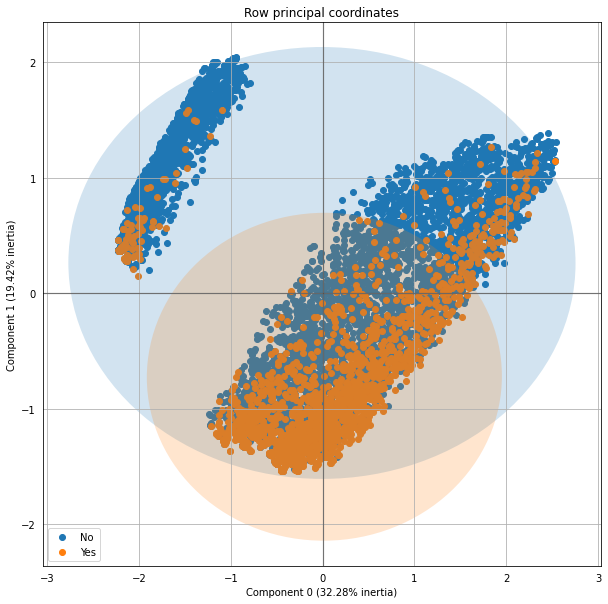

In [ ]:
ax1 = famd.plot_row_coordinates(
    data_cat,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    #labels=data.index,
    color_labels=y,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True,
)

In [ ]:
famd1 = prince.FAMD(
    n_components=20,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
famd1_ = famd1.fit_transform(data_cat)

In [ ]:
famd1.total_inertia_

0.0006300041037941477

In [ ]:
famd1.explained_inertia_

array([0.32284402, 0.19424611, 0.07908889, 0.03974782, 0.03493701,
       0.03458657, 0.02907592, 0.02388818, 0.02356488, 0.02318924,
       0.02231156, 0.02176053, 0.01966291, 0.019241  , 0.01854014,
       0.01822275, 0.01690367, 0.01480222, 0.01469273, 0.0134125 ])

In [ ]:
exp_var_cum2 = np.cumsum(famd1.explained_inertia_)

In [ ]:
px. area(
    x=range(1, 21),
    y=exp_var_cum2,
    labels={'x': 'Number of components', 'y':'Explained inertia'}
)

## Locally Linear Embedding

In [ ]:
lle = LocallyLinearEmbedding(
    n_components=2, 
    n_neighbors=3, 
    reg=10 , 
    eigen_solver='dense', 
    n_jobs=-1
)
ll2 = pd.DataFrame(lle.fit_transform(scaled), index=X.index)

In [ ]:
fig = px.scatter(ll2, x=0, y=1, color=y)
fig.show()

## t-SNE

In [ ]:
tsne = TSNE(
    n_components=2, 
    perplexity=10, 
    n_iter=1000, 
    verbose=10, 
    n_jobs=-1, 
    learning_rate=250
)
tsne_ = pd.DataFrame(tsne.fit_transform(scaled), index=X.index)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7032 samples in 0.102s...
[t-SNE] Computed neighbors for 7032 samples in 2.912s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7032
[t-SNE] Computed conditional probabilities for sample 2000 / 7032
[t-SNE] Computed conditional probabilities for sample 3000 / 7032
[t-SNE] Computed conditional probabilities for sample 4000 / 7032
[t-SNE] Computed conditional probabilities for sample 5000 / 7032
[t-SNE] Computed conditional probabilities for sample 6000 / 7032
[t-SNE] Computed conditional probabilities for sample 7000 / 7032
[t-SNE] Computed conditional probabilities for sample 7032 / 7032
[t-SNE] Mean sigma: 0.014868
[t-SNE] Computed conditional probabilities in 0.145s
[t-SNE] Iteration 50: error = 103.9498749, gradient norm = 0.0302060 (50 iterations in 4.041s)
[t-SNE] Iteration 100: error = 95.0270386, gradient norm = 0.0071767 (50 iterations in 2.747s)
[t-SNE] Iteration 150: error = 93.8298416, gradient norm = 

In [ ]:
fig = px.scatter(tsne_, x=0, y=1, color=y)
fig.show()

## MINISOM

In [ ]:
n_cols = X.shape[1]
grid_cols = 5
grid_rows = 5

som = MiniSom(grid_cols, grid_rows, n_cols)

som.random_weights_init(scaled)
som.train_random(scaled, num_iteration=1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 2.1711885157271626


In [ ]:
def som_pie_grid(som, data, labels):
  """Helper to create piechart grid viz
  
  Example: https://raw.githubusercontent.com/JustGlowing/minisom/master/examples/resulting_images/som_iris_pies.png

  :param som: fitted MiniSom instance
  :param data: the data the MiniSom was fit to
  :param labels: an array of labels to use for coloring visual
  """
  labels_map = som.labels_map(data, labels)
  label_names = np.unique(labels)

  plt.figure(figsize=(70, 70))
  the_grid = GridSpec(70, 70)
  for position in labels_map.keys():
      label_fracs = [labels_map[position][lab] for lab in label_names]
      plt.subplot(the_grid[position[1] - 12, position[0]], aspect=1)
      patches, texts = plt.pie(label_fracs)

  plt.show()

  # Cheating way to align legend, create a separate figure just 
  # for legend.  Will have superfluous whitespace below
  plt.legend(patches, label_names, loc='upper left', ncol=5)
  plt.axis('off')
  plt.show()

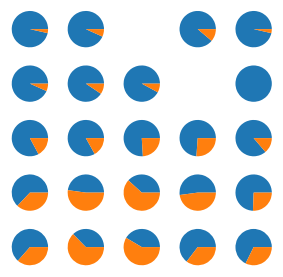

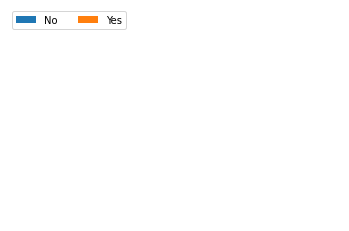

In [ ]:
som_pie_grid(som, scaled, y)

## UMAP

In [ ]:
umap2 = umap.UMAP(n_neighbors=100, min_dist=.75, n_components=2, metric='correlation')
umap2_ = pd.DataFrame(umap2.fit_transform(scaled))

In [ ]:
fig = px.scatter(umap2_, x=0, y=1, color=y)
fig.show()

# Clustering data 1 w/ FAMD Dimensionality Reduction

In [ ]:
# Creating dataframe copy to append FAMD clustering results.
data_cat2 = data_cat.copy()

In [ ]:
famd2 = prince.FAMD(
    n_components=15,
    n_iter=5000,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=2
)
famd2_ = famd2.fit_transform(data_cat)

## KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=2)
data_cat2['kmean_clus'] = kmeans.fit_predict(famd2_)

In [ ]:
data_cat2.kmean_clus.value_counts()

2    2789
3    2063
0    1520
1     660
Name: kmean_clus, dtype: int64

In [ ]:
kmean_pred = kmeans.predict(famd2_)
pd.crosstab(y, kmean_pred)

col_0     0    1     2     3
Churn                       
No     1407  490  1511  1755
Yes     113  170  1278   308

In [ ]:
clus_meansfk = data_cat2.groupby('kmean_clus').mean().reset_index()
clus_meansfk

kmean_clus     tenure  MonthlyCharges  TotalCharges
0           0  30.667763       21.076283    665.220329
1           1  30.618182       41.294015   1404.742727
2           2  14.751165       74.177071   1108.233363
3           3  58.180320       91.852230   5345.148206

In [ ]:
fig = px.histogram(data_cat, x=data_cat2['kmean_clus'], y=y, color=y)
fig.show()

In [ ]:
silfakm = round(metrics.silhouette_score(famd2_, data_cat2['kmean_clus'], metric='euclidean'),4)

In [ ]:
arsfakm = round(metrics.adjusted_rand_score(y, data_cat2['kmean_clus']),4)

## Gaussian Mixture

In [ ]:
gmm = GaussianMixture(
    n_components=4, 
    init_params='random', 
    covariance_type='spherical', 
    verbose=1,
    random_state=2
)
data_cat2['gmm_clus'] = gmm.fit_predict(famd2_)

Initialization 0
  Iteration 10
Initialization converged: True


In [ ]:
data_cat2.gmm_clus.value_counts()

0    2669
1    2201
3    1520
2     642
Name: gmm_clus, dtype: int64

In [ ]:
gmm_pred = gmm.predict(famd2_)
pd.crosstab(y, gmm_pred)

col_0     0     1    2     3
Churn                       
No     1423  1861  472  1407
Yes    1246   340  170   113

In [ ]:
clus_meansfg = data_cat2.groupby('gmm_clus').mean().reset_index()
clus_meansfg

gmm_clus     tenure  MonthlyCharges  TotalCharges  kmean_clus
0         0  13.823904       73.776058   1029.937167    2.000000
1         1  57.032258       91.113812   5199.844934    2.929123
2         2  29.518692       40.771417   1325.970093    1.000000
3         3  30.667763       21.076283    665.220329    0.000000

In [ ]:
fig = px.histogram(data_cat, x=data_cat2['gmm_clus'], y=y, color=y)
fig.show()

In [ ]:
silfagm = round(metrics.silhouette_score(famd2_, data_cat2['gmm_clus'], metric='euclidean'),4)

In [ ]:
arsfagm = round(metrics.adjusted_rand_score(y, data_cat2['gmm_clus']),4)

## Mean Shift

In [ ]:
msh = MeanShift(bandwidth=1.625, n_jobs=-1)
data_cat2['msh_clus'] = msh.fit_predict(famd2_)

In [ ]:
data_cat2.msh_clus.value_counts()

0    2816
1    2078
2    1520
3     618
Name: msh_clus, dtype: int64

In [ ]:
msh_pred = msh.predict(famd2_)
pd.crosstab(y, msh_pred)

col_0     0     1     2    3
Churn                       
No     1537  1770  1407  449
Yes    1279   308   113  169

In [ ]:
clus_meansfm = data_cat2.groupby('msh_clus').mean().reset_index()
clus_meansfm

msh_clus     tenure  MonthlyCharges  TotalCharges  kmean_clus  gmm_clus
0         0  15.075994       74.042081   1126.465412    2.011719  0.052202
1         1  58.495669       91.598653   5348.199591    2.956689  1.011550
2         2  30.667763       21.076283    665.220329    0.000000  3.000000
3         3  28.101942       40.097977   1228.719175    1.000000  2.000000

In [ ]:
fig = px.histogram(data_cat, x=data_cat2['msh_clus'], y=y, color=y)
fig.show()

In [ ]:
silfams = round(metrics.silhouette_score(famd2_, data_cat2['msh_clus'], metric='euclidean'),4)

In [ ]:
arsfams = round(metrics.adjusted_rand_score(y, data_cat2['msh_clus']),4)

## Agglomerative Clustering

In [ ]:
aggclus = AgglomerativeClustering(n_clusters=4, linkage='complete')
data_cat2['agg_clus'] = aggclus.fit_predict(famd2_)

In [ ]:
data_cat2.agg_clus.value_counts()

3    2694
0    2138
2    1520
1     680
Name: agg_clus, dtype: int64

In [ ]:
pd.crosstab(y, data_cat2['agg_clus'])

agg_clus     0    1     2     3
Churn                          
No        1790  510  1407  1456
Yes        348  170   113  1238

In [ ]:
clus_meansfa = data_cat2.groupby('agg_clus').mean().reset_index()
clus_meansfa

agg_clus     tenure  MonthlyCharges  ...  kmean_clus  gmm_clus  msh_clus
0         0  56.448082       91.488704  ...    2.904116  0.935454  0.895229
1         1  31.830882       41.992500  ...    1.058824  1.944118  2.817647
2         2  30.667763       21.076283  ...    0.000000  3.000000  2.000000
3         3  14.492947       74.041314  ...    2.040831  0.060505  0.037862

[4 rows x 7 columns]

In [ ]:
fig = px.histogram(data_cat, x=data_cat2['agg_clus'], y=y, color=y)
fig.show()

In [ ]:
silfaag = round(metrics.silhouette_score(famd2_, data_cat2['agg_clus'], metric='euclidean'),4)

In [ ]:
arsfaag = round(metrics.adjusted_rand_score(y, data_cat2['agg_clus']),4)

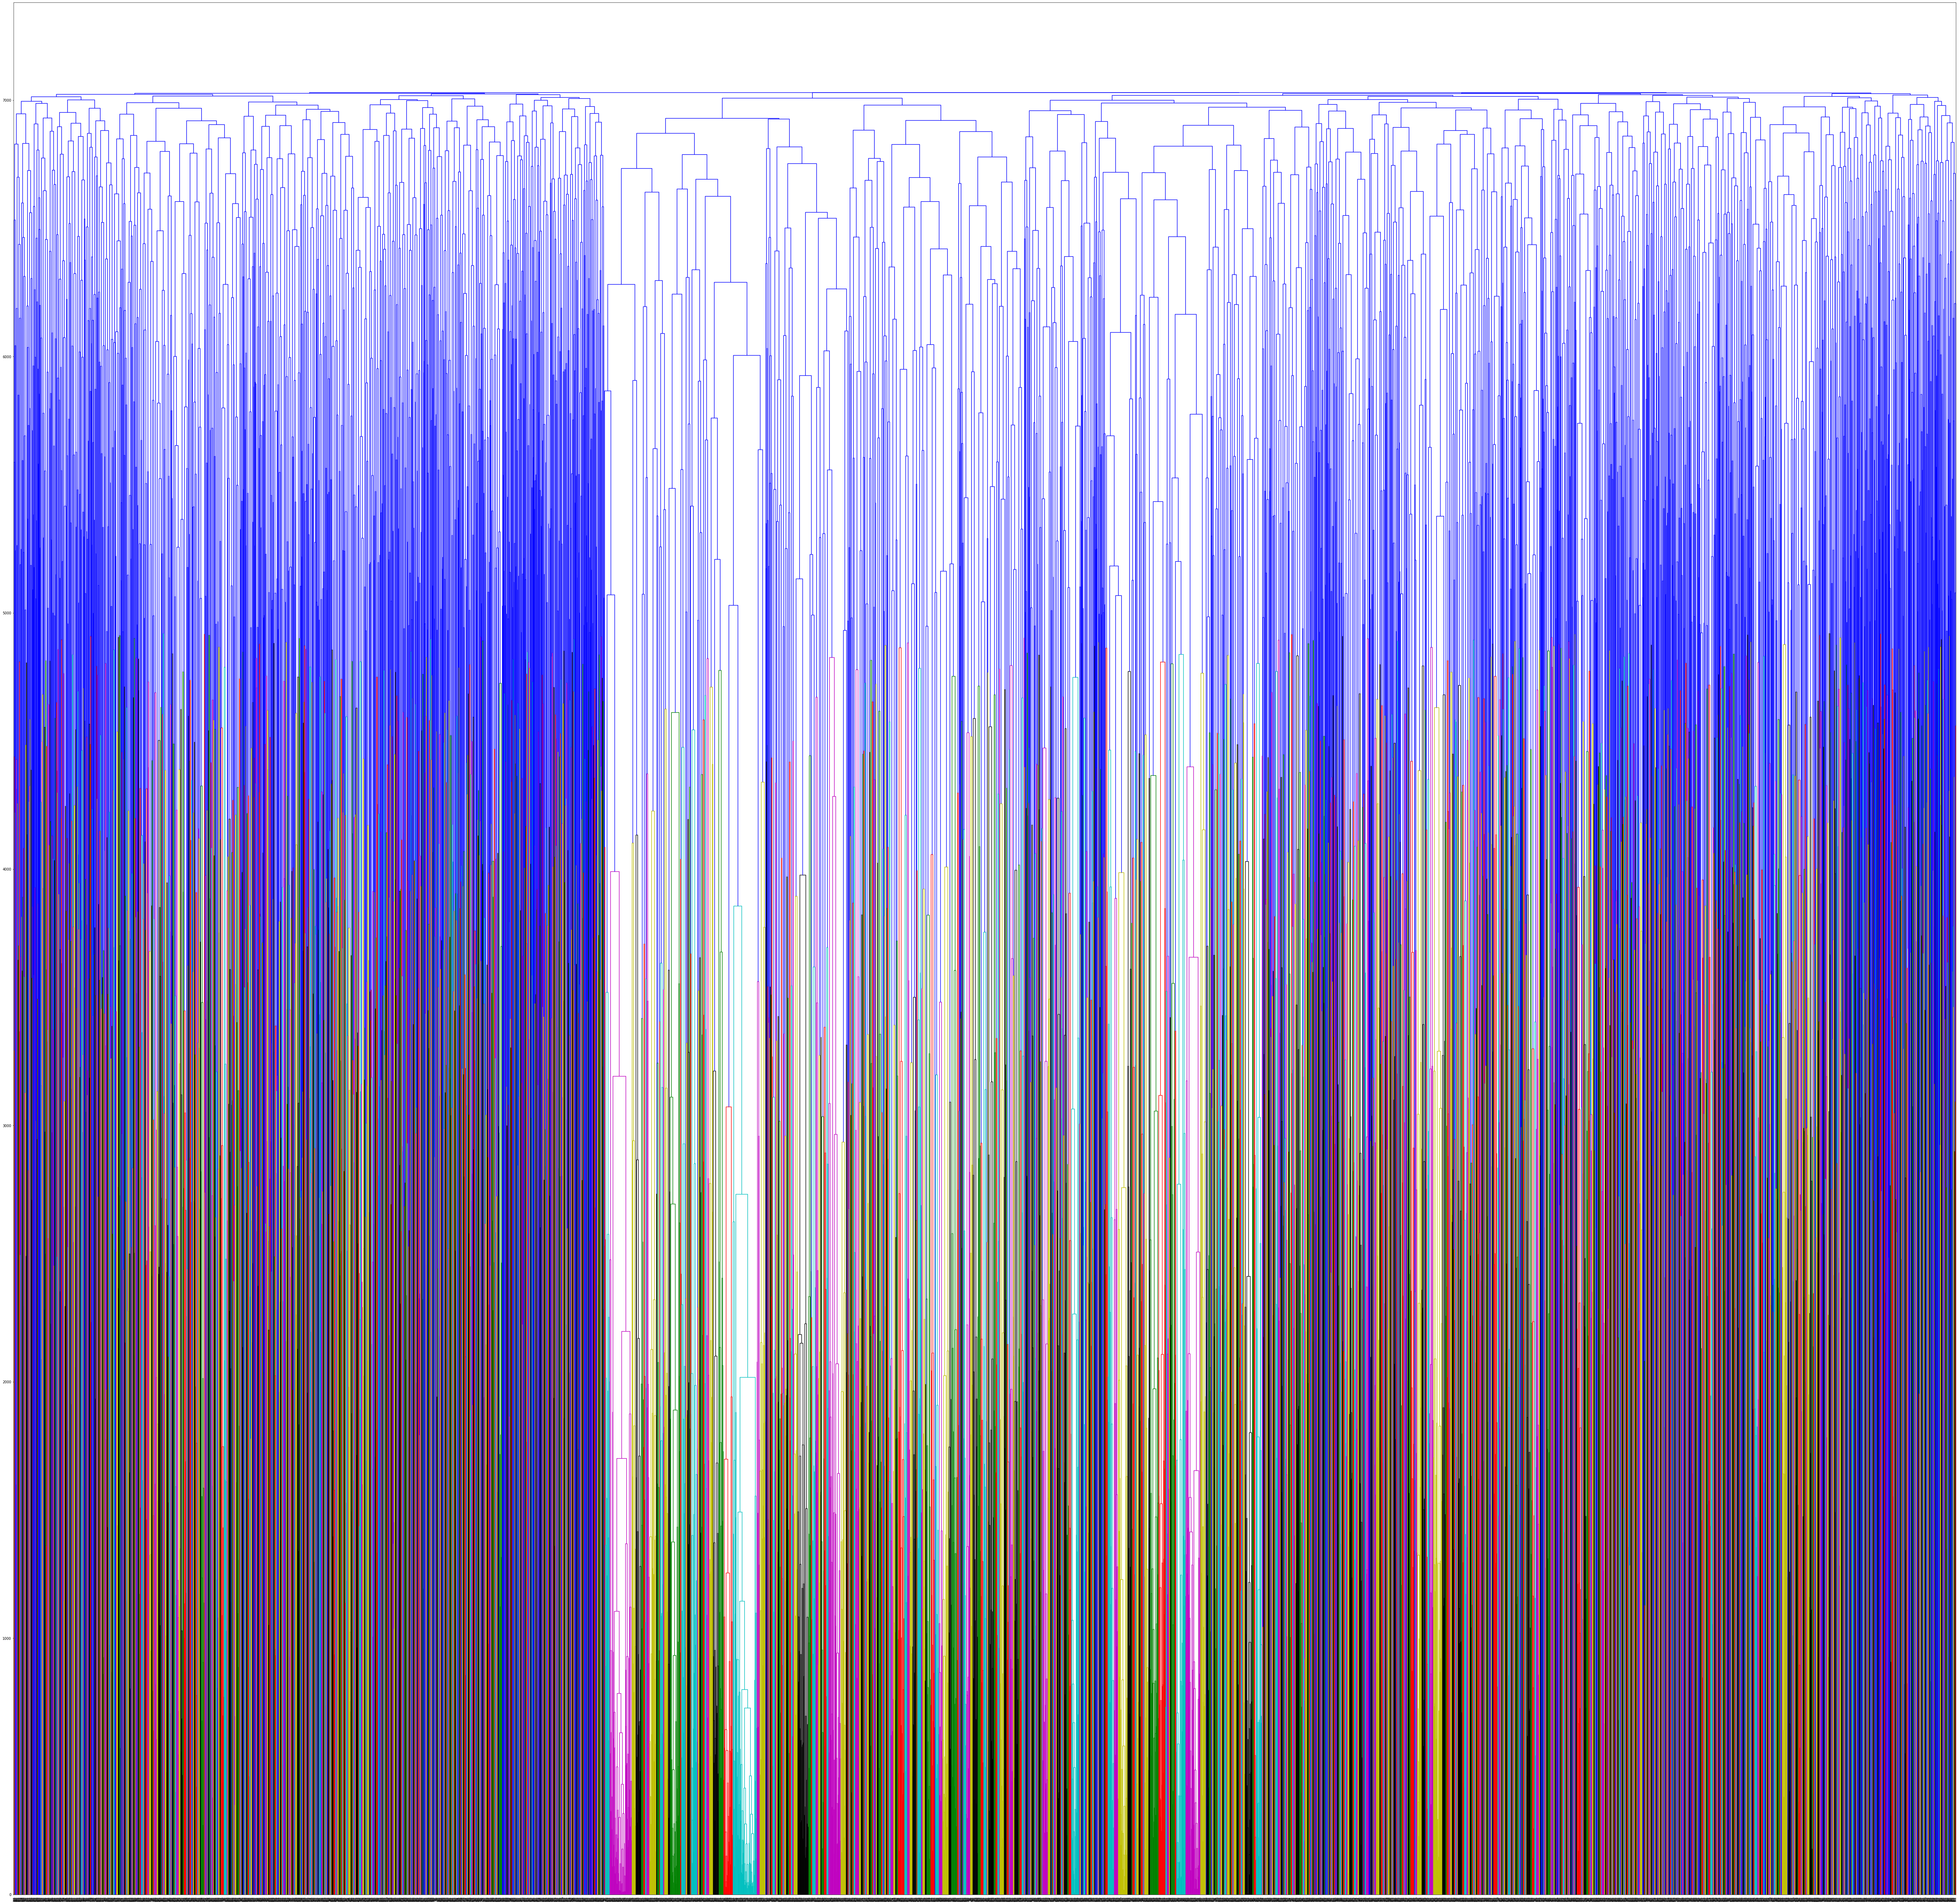

In [ ]:
plt.figure(figsize=(100,100))
plot_dendrogram(aggclus, truncate_mode=None, p=10)
plt.show()

## DBScan

In [ ]:
dbs = DBSCAN(eps=1, min_samples=20, n_jobs=-1)
data_cat2['dbs_clus'] = dbs.fit_predict(famd2_)
len(data_cat2.dbs_clus.value_counts())

4

In [ ]:
data_cat2.dbs_clus.value_counts()

 1    3456
-1    1808
 2    1512
 0     256
Name: dbs_clus, dtype: int64

In [ ]:
pd.crosstab(y, data_cat2['dbs_clus'])

dbs_clus    -1    0     1     2
Churn                          
No        1581  139  2044  1399
Yes        227  117  1412   113

In [ ]:
clus_meansfd = data_cat2.groupby('dbs_clus').mean().reset_index()
clus_meansfd

dbs_clus     tenure  MonthlyCharges  ...  gmm_clus  msh_clus  agg_clus
0        -1  45.485619       72.161007  ...  1.012168  1.135509  0.983407
1         0   9.726562       33.204883  ...  2.000000  3.000000  1.000000
2         1  28.069734       82.417810  ...  0.337674  0.326100  1.951389
3         2  30.590608       21.069775  ...  3.000000  2.000000  2.000000

[4 rows x 8 columns]

In [ ]:
fig = px.histogram(data_cat, x=data_cat2['dbs_clus'], y=y, color=y)
fig.show()

In [ ]:
silfadb = round(metrics.silhouette_score(famd2_, data_cat2['dbs_clus'], metric='euclidean'),4)

In [ ]:
arsfadb = round(metrics.adjusted_rand_score(y, data_cat2['dbs_clus']),4)

# Clustering data 1 w/ t-SNE Dimensionality Reduction

In [ ]:
# Creating dataframe copy to append t-SNE clustering results.
data_cat3 = data_cat.copy()

In [ ]:
tsne = TSNE(
    n_components=15, 
    perplexity=10, 
    n_iter=1000, 
    verbose=10, 
    n_jobs=-1, 
    learning_rate=250,
    method='exact',
    random_state=2
)
tsne_ = pd.DataFrame(tsne.fit_transform(scaled), index=X.index)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 7032
[t-SNE] Computed conditional probabilities for sample 2000 / 7032
[t-SNE] Computed conditional probabilities for sample 3000 / 7032
[t-SNE] Computed conditional probabilities for sample 4000 / 7032
[t-SNE] Computed conditional probabilities for sample 5000 / 7032
[t-SNE] Computed conditional probabilities for sample 6000 / 7032
[t-SNE] Computed conditional probabilities for sample 7000 / 7032
[t-SNE] Computed conditional probabilities for sample 7032 / 7032
[t-SNE] Mean sigma: 0.014862
[t-SNE] Iteration 50: error = 104.5044028, gradient norm = 0.0162709 (50 iterations in 309.480s)
[t-SNE] Iteration 100: error = 94.5428714, gradient norm = 0.0008748 (50 iterations in 322.158s)
[t-SNE] Iteration 150: error = 93.8598882, gradient norm = 0.0002777 (50 iterations in 321.515s)
[t-SNE] Iteration 200: error = 93.6721041, gradient norm = 0.0002080 (50 iterations in 319.861s)
[t-SNE] Iterati

## KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=2)
data_cat3['kmean_clus'] = kmeans.fit_predict(tsne_)

In [ ]:
data_cat3.kmean_clus.value_counts()

3    2881
1    1786
0    1667
2     698
Name: kmean_clus, dtype: int64

In [ ]:
kmean_pred1 = kmeans.predict(tsne_)
pd.crosstab(y, kmean_pred1)

col_0     0    1    2     3
Churn                      
No     1209  873  525  2556
Yes     458  913  173   325

In [ ]:
clus_meanstk = data_cat3.groupby('kmean_clus').mean().reset_index()
clus_meanstk

kmean_clus     tenure  MonthlyCharges  TotalCharges
0           0  21.824235       62.248920   1432.591752
1           1  25.238522       88.320381   2313.279479
2           2  31.936963       42.855946   1531.578152
3           3  43.124262       57.007428   2939.076553

In [ ]:
fig = px.histogram(data_cat, x=data_cat3['kmean_clus'], y=y, color=y)
fig.show()

In [ ]:
siltskm = round(metrics.silhouette_score(tsne_, data_cat3['kmean_clus'], metric='euclidean'),4)

In [ ]:
arstskm = round(metrics.adjusted_rand_score(y, data_cat3['kmean_clus']),4)

## Gaussian Mixture

In [ ]:
gmm = GaussianMixture(
    n_components=4, 
    init_params='random', 
    covariance_type='spherical', 
    verbose=1,
    random_state=2
)
data_cat3['gmm_clus'] = gmm.fit_predict(tsne_)

Initialization 0
  Iteration 10
Initialization converged: True


In [ ]:
data_cat3.gmm_clus.value_counts()

1    2416
0    2121
2    1666
3     829
Name: gmm_clus, dtype: int64

In [ ]:
gmm_pred1 = gmm.predict(tsne_)
pd.crosstab(y, gmm_pred1)

col_0     0     1     2    3
Churn                       
No     1047  2061  1286  769
Yes    1074   355   380   60

In [ ]:
clus_meanstg = data_cat3.groupby('gmm_clus').mean().reset_index()
clus_meanstg

gmm_clus     tenure  MonthlyCharges  TotalCharges  kmean_clus
0         0  20.501650       82.437671   1759.957190    0.739745
1         1  46.577401       72.068667   3810.877711    2.691639
2         2  26.646459       51.971759   1474.794328    0.858343
3         3  33.271411       24.255549    795.188902    2.802171

In [ ]:
fig = px.histogram(data_cat, x=data_cat3['gmm_clus'], y=y, color=y)
fig.show()

In [ ]:
siltsgm = round(metrics.silhouette_score(tsne_, data_cat3['gmm_clus'], metric='euclidean'),4)

In [ ]:
arstsgm = round(metrics.adjusted_rand_score(y, data_cat3['gmm_clus']),4)

## Mean Shift

In [ ]:
msh = MeanShift(bandwidth=4, n_jobs=-1)
data_cat3['msh_clus'] = msh.fit_predict(tsne_)
data_cat3.msh_clus.value_counts()

0    3480
1    1814
2     829
3     263
4     223
6     212
7     104
5      77
8      30
Name: msh_clus, dtype: int64

In [ ]:
msh_pred1 = msh.predict(tsne_)
pd.crosstab(y, msh_pred1)

col_0     0     1    2    3    4   5    6   7   8
Churn                                            
No     2418  1285  655  262  222  64  191  38  28
Yes    1062   529  174    1    1  13   21  66   2

In [ ]:
clus_meanstm = data_cat3.groupby('msh_clus').mean().reset_index()
clus_meanstm

msh_clus     tenure  MonthlyCharges  TotalCharges  kmean_clus  gmm_clus
0         0  36.648563       77.390287   3069.270718    2.087356  0.908046
1         1  22.557883       64.736687   1517.271555    0.269019  1.169239
2         2  35.037394       45.753498   1832.879614    2.155609  1.893848
3         3  51.026616       35.280038   1994.975095    2.988593  1.030418
4         4  44.390135       21.292152    959.335650    2.717489  3.000000
5         5   7.012987       20.029870    140.292857    2.064935  2.558442
6         6  20.622642       27.132075    880.393396    3.000000  1.000000
7         7   5.413462       71.260096    390.291827    0.461538  0.000000
8         8  56.433333       74.955000   4222.406667    1.700000  1.166667

In [ ]:
fig = px.histogram(data_cat, x=data_cat3['msh_clus'], y=y, color=y)
fig.show()

In [ ]:
siltsms = round(metrics.silhouette_score(tsne_, data_cat3['msh_clus'], metric='euclidean'),4)

In [ ]:
arstsms = round(metrics.adjusted_rand_score(y, data_cat3['msh_clus']),4)

## Agglomerative Clustering

In [ ]:
aggclus2 = AgglomerativeClustering(n_clusters=4, linkage='complete')
data_cat3['agg_clus'] = aggclus2.fit_predict(tsne_)

In [ ]:
data_cat3.agg_clus.value_counts()

0    3546
2    2121
1     685
3     680
Name: agg_clus, dtype: int64

In [ ]:
pd.crosstab(y, data_cat3['agg_clus'])

agg_clus     0    1     2    3
Churn                         
No        2630  324  1699  510
Yes        916  361   422  170

In [ ]:
clus_meansta = data_cat3.groupby('agg_clus').mean().reset_index()
clus_meansta

agg_clus     tenure  MonthlyCharges  ...  kmean_clus  gmm_clus  msh_clus
0         0  38.827411       75.670629  ...    2.119853  0.889735  0.816695
1         1  13.913869       74.961533  ...    0.662774  0.145985  1.643796
2         2  27.879302       50.650354  ...    1.175860  1.720886  1.129656
3         3  31.830882       41.992500  ...    2.000000  1.955882  2.000000

[4 rows x 7 columns]

In [ ]:
fig = px.histogram(data_cat, x=data_cat3['agg_clus'], y=y, color=y)
fig.show()

In [ ]:
siltsag = round(metrics.silhouette_score(tsne_, data_cat3['agg_clus'], metric='euclidean'),4)

In [ ]:
arstsag = round(metrics.adjusted_rand_score(y, data_cat3['agg_clus']),4)

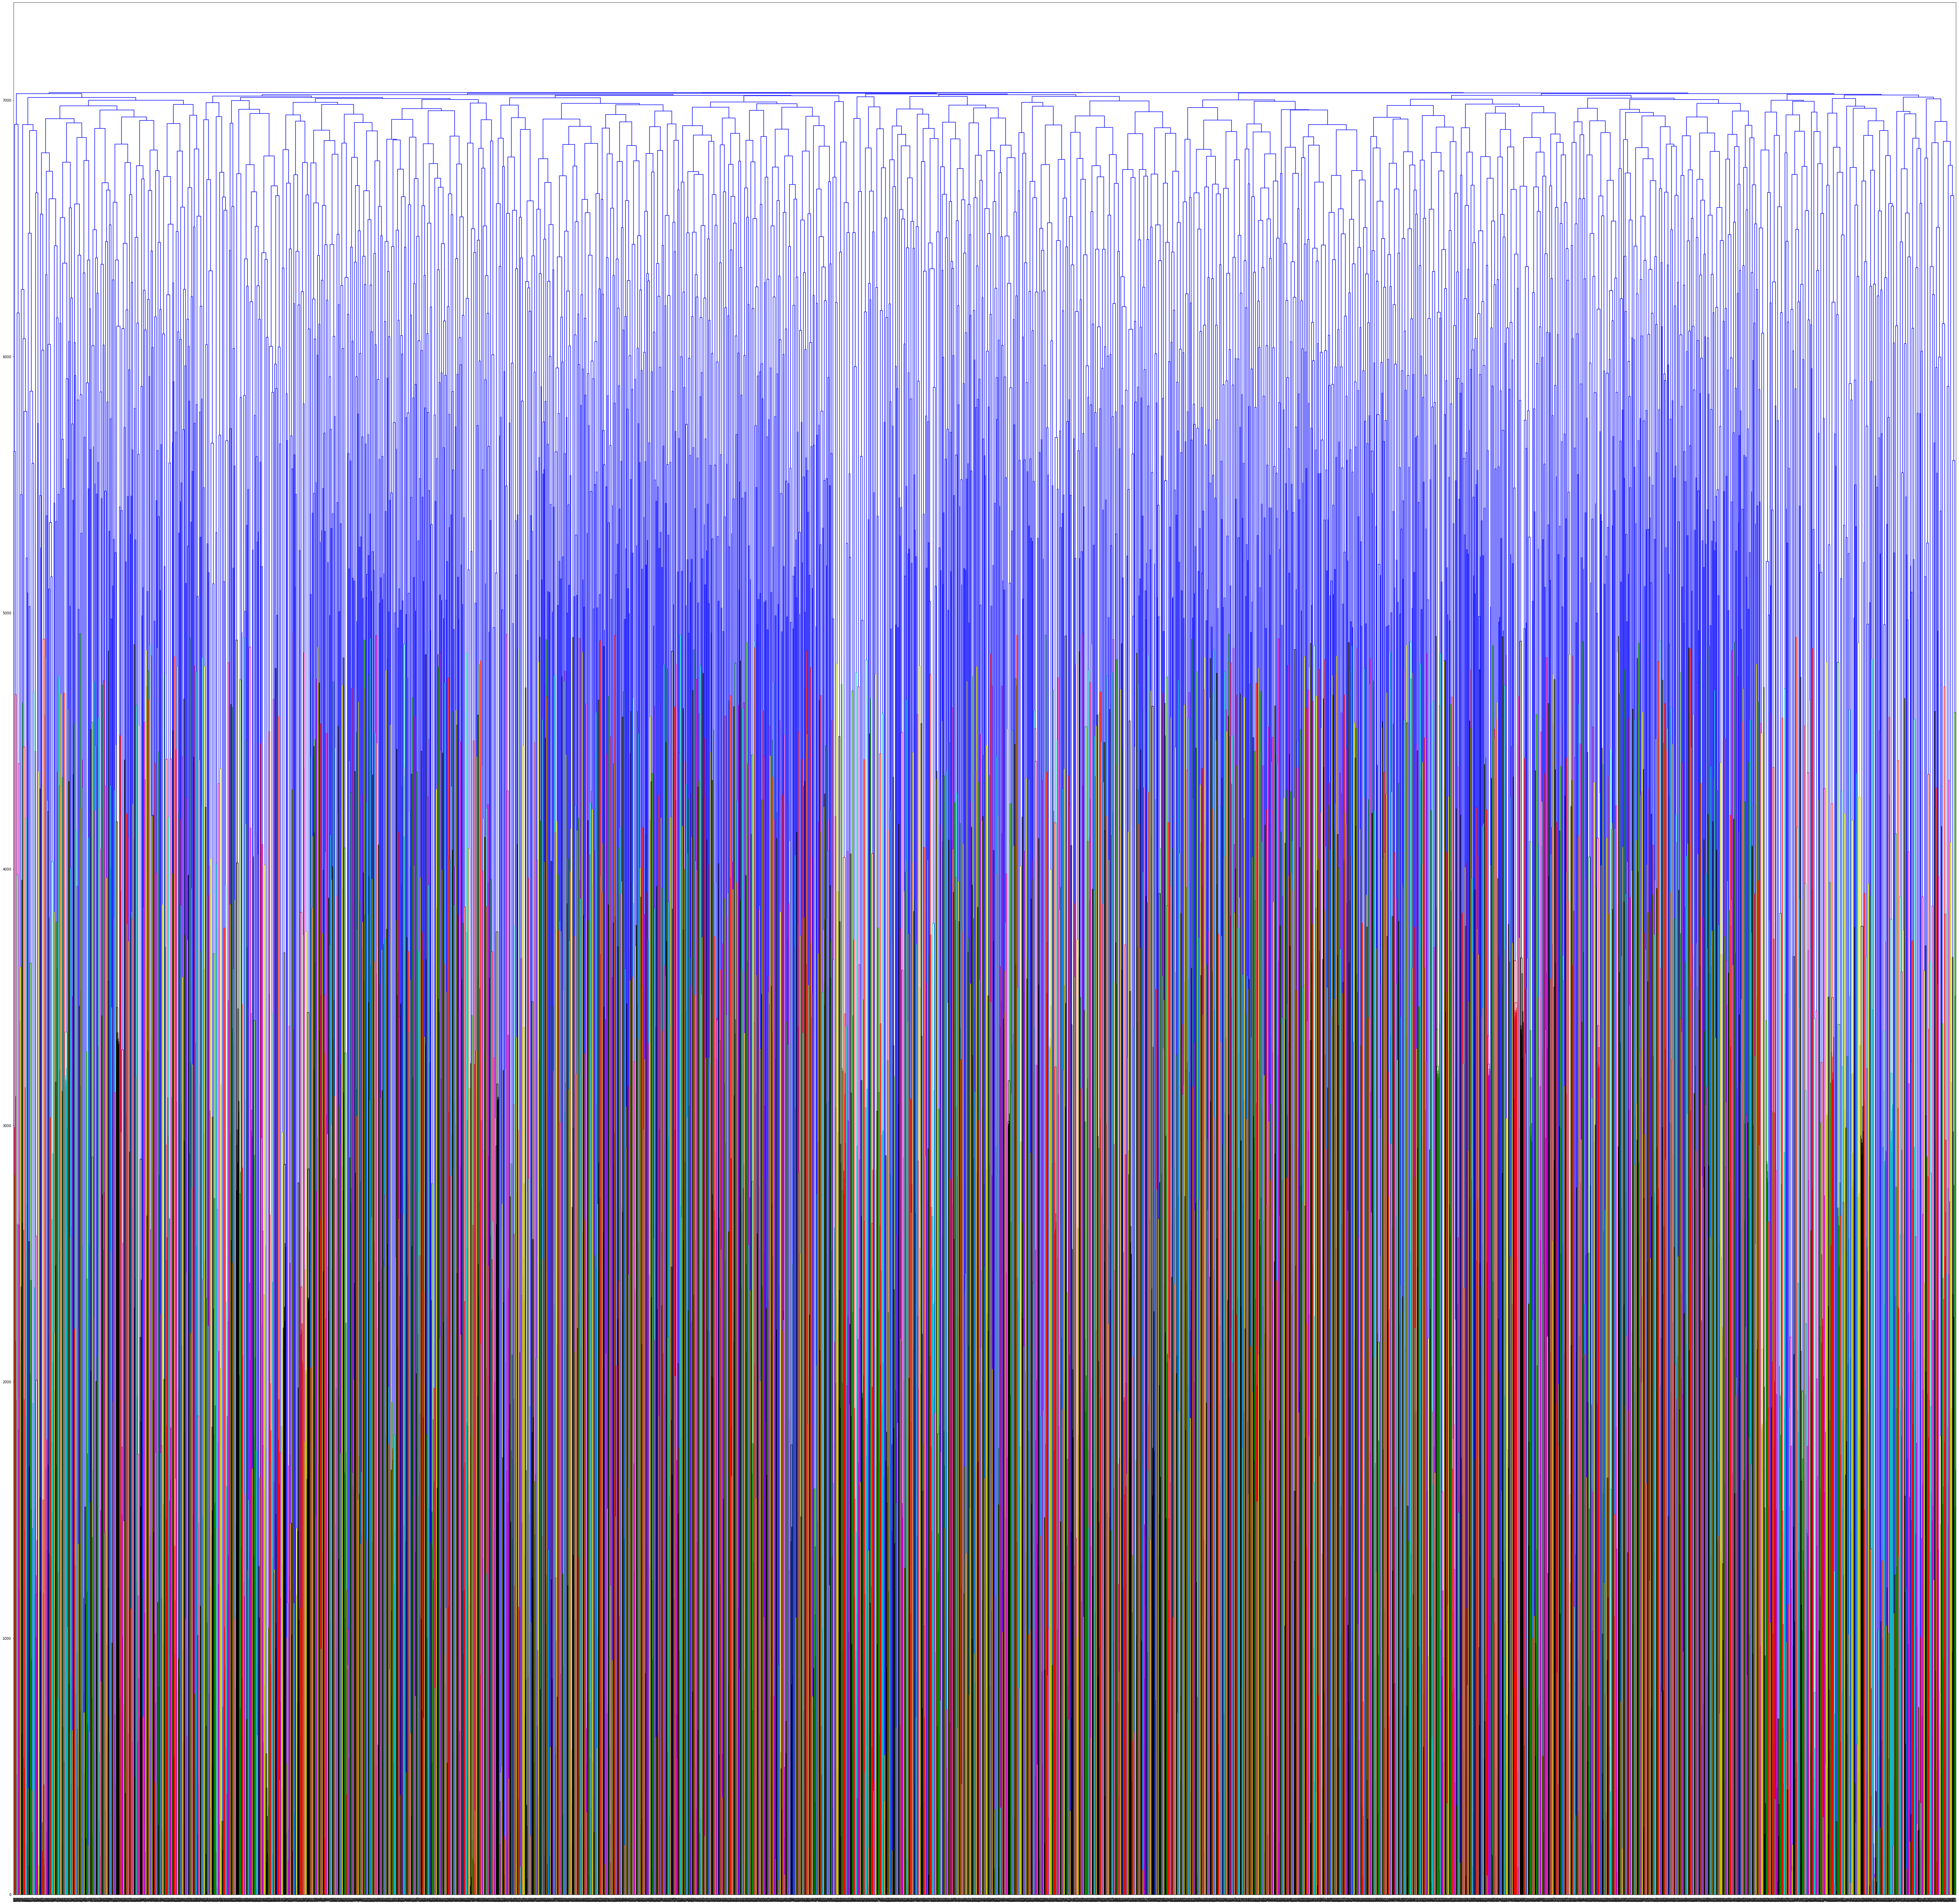

In [ ]:
plt.figure(figsize=(100,100))
plot_dendrogram(aggclus2, truncate_mode=None, p=10)
plt.show()

## DBScan

In [ ]:
dbs = DBSCAN(eps=3, min_samples=12, n_jobs=-1)
data_cat3['dbs_clus'] = dbs.fit_predict(tsne_)
len(data_cat3.dbs_clus.value_counts())

5

In [ ]:
data_cat3.dbs_clus.value_counts()

 0    5506
 1    1426
 2      40
 3      30
-1      30
Name: dbs_clus, dtype: int64

In [ ]:
pd.crosstab(y, data_cat3['dbs_clus'])

dbs_clus  -1     0     1   2   3
Churn                           
No        29  3751  1317  36  30
Yes        1  1755   109   4   0

In [ ]:
clus_meanstd = data_cat3.groupby('dbs_clus').mean().reset_index()
clus_meanstd

dbs_clus     tenure  MonthlyCharges  ...  gmm_clus  msh_clus  agg_clus
0        -1  52.266667       32.765000  ...  1.633333  3.033333  0.933333
1         0  32.905013       76.848502  ...  0.932074  0.842717  1.004359
2         1  30.696353       21.143478  ...  2.008415  1.947405  0.929874
3         2   8.825000       20.031250  ...  2.500000  3.750000  0.575000
4         3  37.366667       19.945000  ...  3.000000  4.000000  2.000000

[5 rows x 8 columns]

In [ ]:
fig = px.histogram(data_cat, x=data_cat3['dbs_clus'], y=y, color=y)
fig.show()

In [ ]:
siltsdb = round(metrics.silhouette_score(tsne_, data_cat3['dbs_clus'], metric='euclidean'),4)

In [ ]:
arstsdb = round(metrics.adjusted_rand_score(y, data_cat3['dbs_clus']),4)

# Data 2: Dimensionality Reduction

## PCA

In [ ]:
pcad2 = PCA(n_components=2)
pca_d2 = pd.DataFrame(pcad2.fit_transform(X2), index=X2.index)
print(pcad2.explained_variance_ratio_)

[0.21279969 0.14027251]


In [ ]:
fig = px.scatter(pca_d2, x=0, y=1, color=y2)
fig.show()

In [ ]:
pcalined2 = PCA(n_components=25)
pcalined2.fit(X2)
exp_var_cumd2 = np.cumsum(pcalined2.explained_variance_ratio_)
px. area(
    x=range(1, 26),
    y=exp_var_cumd2,
    labels={'x': 'Number of components', 'y':'Explained variance'}
)

## MCA

In [ ]:
data_catd2 = data2.drop(columns='Churn')

In [ ]:
mcad2 = prince.MCA(
    n_components=2,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
mca_d2 = mcad2.fit_transform(data_catd2)

In [ ]:
print(mcad2.total_inertia_)
print(mcad2.explained_inertia_)

1.894736842105263
[0.23996354473649287, 0.1185358831777957]


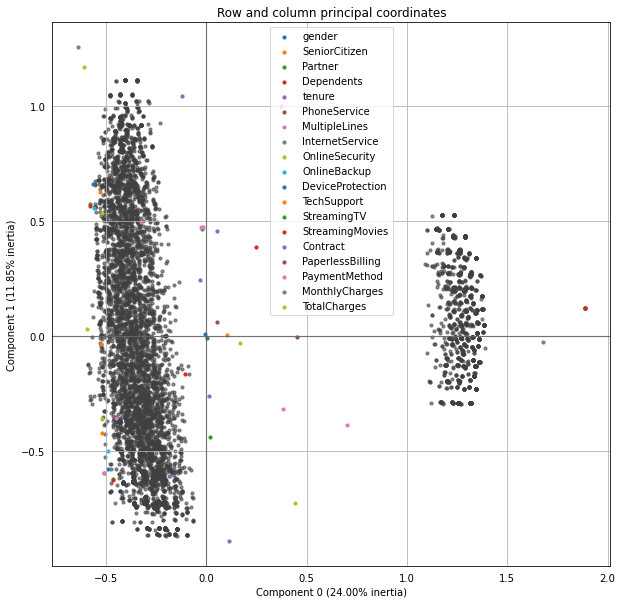

In [ ]:
ax2 = mcad2.plot_coordinates(
    X=data_catd2,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    show_row_points=True,
    row_points_size = 10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size= 10,
    show_column_labels=False
    
)

In [ ]:
mca1d2 = prince.MCA(
    n_components=20,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=None
)
mca1_d2 = mca1d2.fit_transform(data_catd2)

In [ ]:
print(mca1d2.total_inertia_)
print(mca1d2.explained_inertia_)

1.894736842105263
[0.23996354473649287, 0.11853588317779584, 0.08417246848837788, 0.046710572977720896, 0.04310101251383835, 0.036215092298673805, 0.033248239488820566, 0.030907606080715615, 0.02818785051493238, 0.02761458848519031, 0.026539895013076163, 0.023919356917565728, 0.0234058628446729, 0.02294490313443426, 0.02191142479233029, 0.021331617097262723, 0.020218978631440603, 0.0201346569167341, 0.019390831249774844, 0.018801672354881296]


In [ ]:
exp_var_cum1d2 = np.cumsum(mca1d2.explained_inertia_)
px. area(
    x=range(1, 21),
    y=exp_var_cum1d2,
    labels={'x': 'Number of components', 'y':'Explained inertia'}
)

## FAMD

FAMD requires categorical AND numerical data. All data is categorical. 

## Locally Linear Embedding

In [ ]:
lled2 = LocallyLinearEmbedding(
    n_components=2, 
    n_neighbors=3, 
    reg=10 , 
    eigen_solver='dense', 
    n_jobs=-1
)
ll2d2 = pd.DataFrame(lled2.fit_transform(X2), index=X2.index)

In [ ]:
fig = px.scatter(ll2d2, x=0, y=1, color=y2)
fig.show()

## t-SNE

In [ ]:
tsned2 = TSNE(
    n_components=2, 
    perplexity=160, 
    n_iter=1000, 
    verbose=10, 
    n_jobs=-1, 
    learning_rate=350
)
tsne_d2 = pd.DataFrame(tsned2.fit_transform(X2), index=X2.index)
fig = px.scatter(tsne_d2, x=0, y=1, color=y2)
fig.show()

[t-SNE] Computing 481 nearest neighbors...
[t-SNE] Indexed 7032 samples in 0.119s...
[t-SNE] Computed neighbors for 7032 samples in 5.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7032
[t-SNE] Computed conditional probabilities for sample 2000 / 7032
[t-SNE] Computed conditional probabilities for sample 3000 / 7032
[t-SNE] Computed conditional probabilities for sample 4000 / 7032
[t-SNE] Computed conditional probabilities for sample 5000 / 7032
[t-SNE] Computed conditional probabilities for sample 6000 / 7032
[t-SNE] Computed conditional probabilities for sample 7000 / 7032
[t-SNE] Computed conditional probabilities for sample 7032 / 7032
[t-SNE] Mean sigma: 1.224253
[t-SNE] Computed conditional probabilities in 2.196s
[t-SNE] Iteration 50: error = 70.1362152, gradient norm = 0.0267107 (50 iterations in 6.673s)
[t-SNE] Iteration 100: error = 67.8831406, gradient norm = 0.0050525 (50 iterations in 6.309s)
[t-SNE] Iteration 150: error = 67.5228729, gradient norm = 

## UMAP

In [ ]:
umap2d2 = umap.UMAP(n_neighbors=25, min_dist=.75, n_components=2, metric='cosine')
umap2_d2 = pd.DataFrame(umap2d2.fit_transform(X2))
fig = px.scatter(umap2_d2, x=0, y=1, color=y2)
fig.show()

# Clustering data 2 w/ MCA Dimensionality Reduction

In [ ]:
# Creating dataframe copy to append MCA clustering results.
data_catd22 = data_catd2.copy()

In [ ]:
mca2d2 = prince.MCA(
    n_components=20,
    n_iter=100,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=2
)
mca2_d2 = mca2d2.fit_transform(data_catd2)

## Kmean

In [ ]:
kmeans2d = KMeans(n_clusters=4, random_state=2)
data_catd22['kmean_clus'] = kmeans2d.fit_predict(mca_d2)
data_catd22.kmean_clus.value_counts()

2    2205
3    1705
1    1602
0    1520
Name: kmean_clus, dtype: int64

In [ ]:
kmean_pred2d = kmeans2d.predict(mca_d2)
pd.crosstab(y2, kmean_pred2d)

col_0     0     1     2     3
Churn                        
No     1407  1378  1149  1229
Yes     113   224  1056   476

In [ ]:
clus_means1 = data_catd22.groupby(['kmean_clus', 'tenure']).gender.count().reset_index()
clus_means1

kmean_clus     tenure  gender
0            0       high     227
1            0        low     591
2            0     medium     265
3            0  very-high     437
4            1       high     233
5            1        low       4
6            1     medium      43
7            1  very-high    1322
8            2       high     137
9            2        low    1675
10           2     medium     374
11           2  very-high      19
12           3       high     432
13           3        low     269
14           3     medium     543
15           3  very-high     461

In [ ]:
clus_means2 = data_catd22.groupby(['kmean_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means2

kmean_clus MonthlyCharges  gender
0            0            low    1520
1            1           high     650
2            1         medium      65
3            1      very-high     887
4            2           high    1124
5            2            low     162
6            2         medium     919
7            3           high    1031
8            3            low       2
9            3         medium     443
10           3      very-high     229

In [ ]:
clus_means3 = data_catd22.groupby(['kmean_clus', 'TotalCharges']).gender.count().reset_index()
clus_means3

kmean_clus TotalCharges  gender
0            0          low    1159
1            0       medium     361
2            1         high      51
3            1       medium      19
4            1    very-high    1532
5            2         high      75
6            2          low    1763
7            2       medium     367
8            3         high     564
9            3          low     199
10           3       medium     520
11           3    very-high     422

In [ ]:
fig = px.histogram(data_catd2, x=data_catd22['kmean_clus'], y=y2, color=y2)
fig.show()

In [ ]:
silmckm = round(metrics.silhouette_score(mca_d2, data_catd22['kmean_clus'], metric='euclidean'),4)

In [ ]:
arsmckm = round(metrics.adjusted_rand_score(y, data_catd22['kmean_clus']),4)

## Guassian Mixture

In [ ]:
gmm2d = GaussianMixture(
    n_components=4, 
    init_params='random', 
    covariance_type='spherical', 
    verbose=1,
    random_state=2
)
data_catd22['gmm_clus'] = gmm2d.fit_predict(mca_d2)
data_catd22.gmm_clus.value_counts()

Initialization 0
Initialization converged: True


0    5073
3    1526
2     423
1      10
Name: gmm_clus, dtype: int64

In [ ]:
gmm_pred2d = gmm2d.predict(mca_d2)
pd.crosstab(y2, gmm_pred2d)

col_0     0   1    2     3
Churn                     
No     3348  10  393  1412
Yes    1725   0   30   114

In [ ]:
clus_means4 = data_catd22.groupby(['gmm_clus', 'tenure']).gender.count().reset_index()
clus_means4

gmm_clus     tenure  gender
0          0       high     792
1          0        low    1942
2          0     medium     960
3          0  very-high    1379
4          1  very-high      10
5          2       high      10
6          2  very-high     413
7          3       high     227
8          3        low     597
9          3     medium     265
10         3  very-high     437

In [ ]:
clus_means5 = data_catd22.groupby(['gmm_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means5

gmm_clus MonthlyCharges  gender
0         0           high    2708
1         0            low     158
2         0         medium    1427
3         0      very-high     780
4         1      very-high      10
5         2           high      97
6         2      very-high     326
7         3            low    1526

In [ ]:
clus_means6 = data_catd22.groupby(['gmm_clus', 'TotalCharges']).gender.count().reset_index()
clus_means6

gmm_clus TotalCharges  gender
0         0         high     690
1         0          low    1956
2         0       medium     906
3         0    very-high    1521
4         1    very-high      10
5         2    very-high     423
6         3          low    1165
7         3       medium     361

In [ ]:
fig = px.histogram(data_catd2, x=data_catd22['gmm_clus'], y=y2, color=y2)
fig.show()

In [ ]:
silmcgm = round(metrics.silhouette_score(mca_d2, data_catd22['gmm_clus'], metric='euclidean'),4)

In [ ]:
arsmcgm = round(metrics.adjusted_rand_score(y, data_catd22['gmm_clus']),4)

## Mean Shift

In [ ]:
msh2d = MeanShift(bandwidth=None, n_jobs=-1)
data_catd22['msh_clus'] = msh2d.fit_predict(mca_d2)
data_catd22.msh_clus.value_counts()

0    5512
1    1520
Name: msh_clus, dtype: int64

In [ ]:
msh_pred2d = msh2d.predict(mca_d2)
pd.crosstab(y2, msh_pred2d)

col_0     0     1
Churn            
No     3756  1407
Yes    1756   113

In [ ]:
clus_means7 = data_catd22.groupby(['msh_clus', 'tenure']).gender.count().reset_index()
clus_means7

msh_clus     tenure  gender
0         0       high     802
1         0        low    1948
2         0     medium     960
3         0  very-high    1802
4         1       high     227
5         1        low     591
6         1     medium     265
7         1  very-high     437

In [ ]:
clus_means8 = data_catd22.groupby(['msh_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means8

msh_clus MonthlyCharges  gender
0         0           high    2805
1         0            low     164
2         0         medium    1427
3         0      very-high    1116
4         1            low    1520

In [ ]:
clus_means9 = data_catd22.groupby(['msh_clus', 'TotalCharges']).gender.count().reset_index()
clus_means9

msh_clus TotalCharges  gender
0         0         high     690
1         0          low    1962
2         0       medium     906
3         0    very-high    1954
4         1          low    1159
5         1       medium     361

In [ ]:
fig = px.histogram(data_catd2, x=data_catd22['msh_clus'], y=y2, color=y2)
fig.show()

In [ ]:
silmcms = round(metrics.silhouette_score(mca_d2, data_catd22['msh_clus'], metric='euclidean'),4)

In [ ]:
arsmcms = round(metrics.adjusted_rand_score(y, data_catd22['msh_clus']),4)

## Agglomerative

In [ ]:
aggclus2d = AgglomerativeClustering(n_clusters=4, linkage='complete')
data_catd22['agg_clus'] = aggclus2d.fit_predict(mca_d2)
data_catd22.agg_clus.value_counts()

2    2204
0    1719
3    1589
1    1520
Name: agg_clus, dtype: int64

In [ ]:
pd.crosstab(y2, data_catd22['agg_clus'])

agg_clus     0     1     2     3
Churn                           
No        1469  1407  1134  1153
Yes        250   113  1070   436

In [ ]:
clus_means10 = data_catd22.groupby(['agg_clus', 'tenure']).gender.count().reset_index()
clus_means10

agg_clus     tenure  gender
0          0       high     256
1          0        low       5
2          0     medium      65
3          0  very-high    1393
4          1       high     227
5          1        low     591
6          1     medium     265
7          1  very-high     437
8          2       high     130
9          2        low    1672
10         2     medium     385
11         2  very-high      17
12         3       high     416
13         3        low     271
14         3     medium     510
15         3  very-high     392

In [ ]:
clus_means11 = data_catd22.groupby(['agg_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means11

agg_clus MonthlyCharges  gender
0          0           high     723
1          0         medium      81
2          0      very-high     915
3          1            low    1520
4          2           high    1145
5          2            low     158
6          2         medium     901
7          3           high     937
8          3            low       6
9          3         medium     445
10         3      very-high     201

In [ ]:
clus_means12 = data_catd22.groupby(['agg_clus', 'TotalCharges']).gender.count().reset_index()
clus_means12

agg_clus TotalCharges  gender
0          0         high      78
1          0       medium      26
2          0    very-high    1615
3          1          low    1159
4          1       medium     361
5          2         high      78
6          2          low    1760
7          2       medium     365
8          2    very-high       1
9          3         high     534
10         3          low     202
11         3       medium     515
12         3    very-high     338

In [ ]:
fig = px.histogram(data_catd2, x=data_catd22['agg_clus'], y=y2, color=y2)
fig.show()

In [ ]:
silmcag = round(metrics.silhouette_score(mca_d2, data_catd22['agg_clus'], metric='euclidean'),4)

In [ ]:
arsmcag = round(metrics.adjusted_rand_score(y, data_catd22['agg_clus']),4)

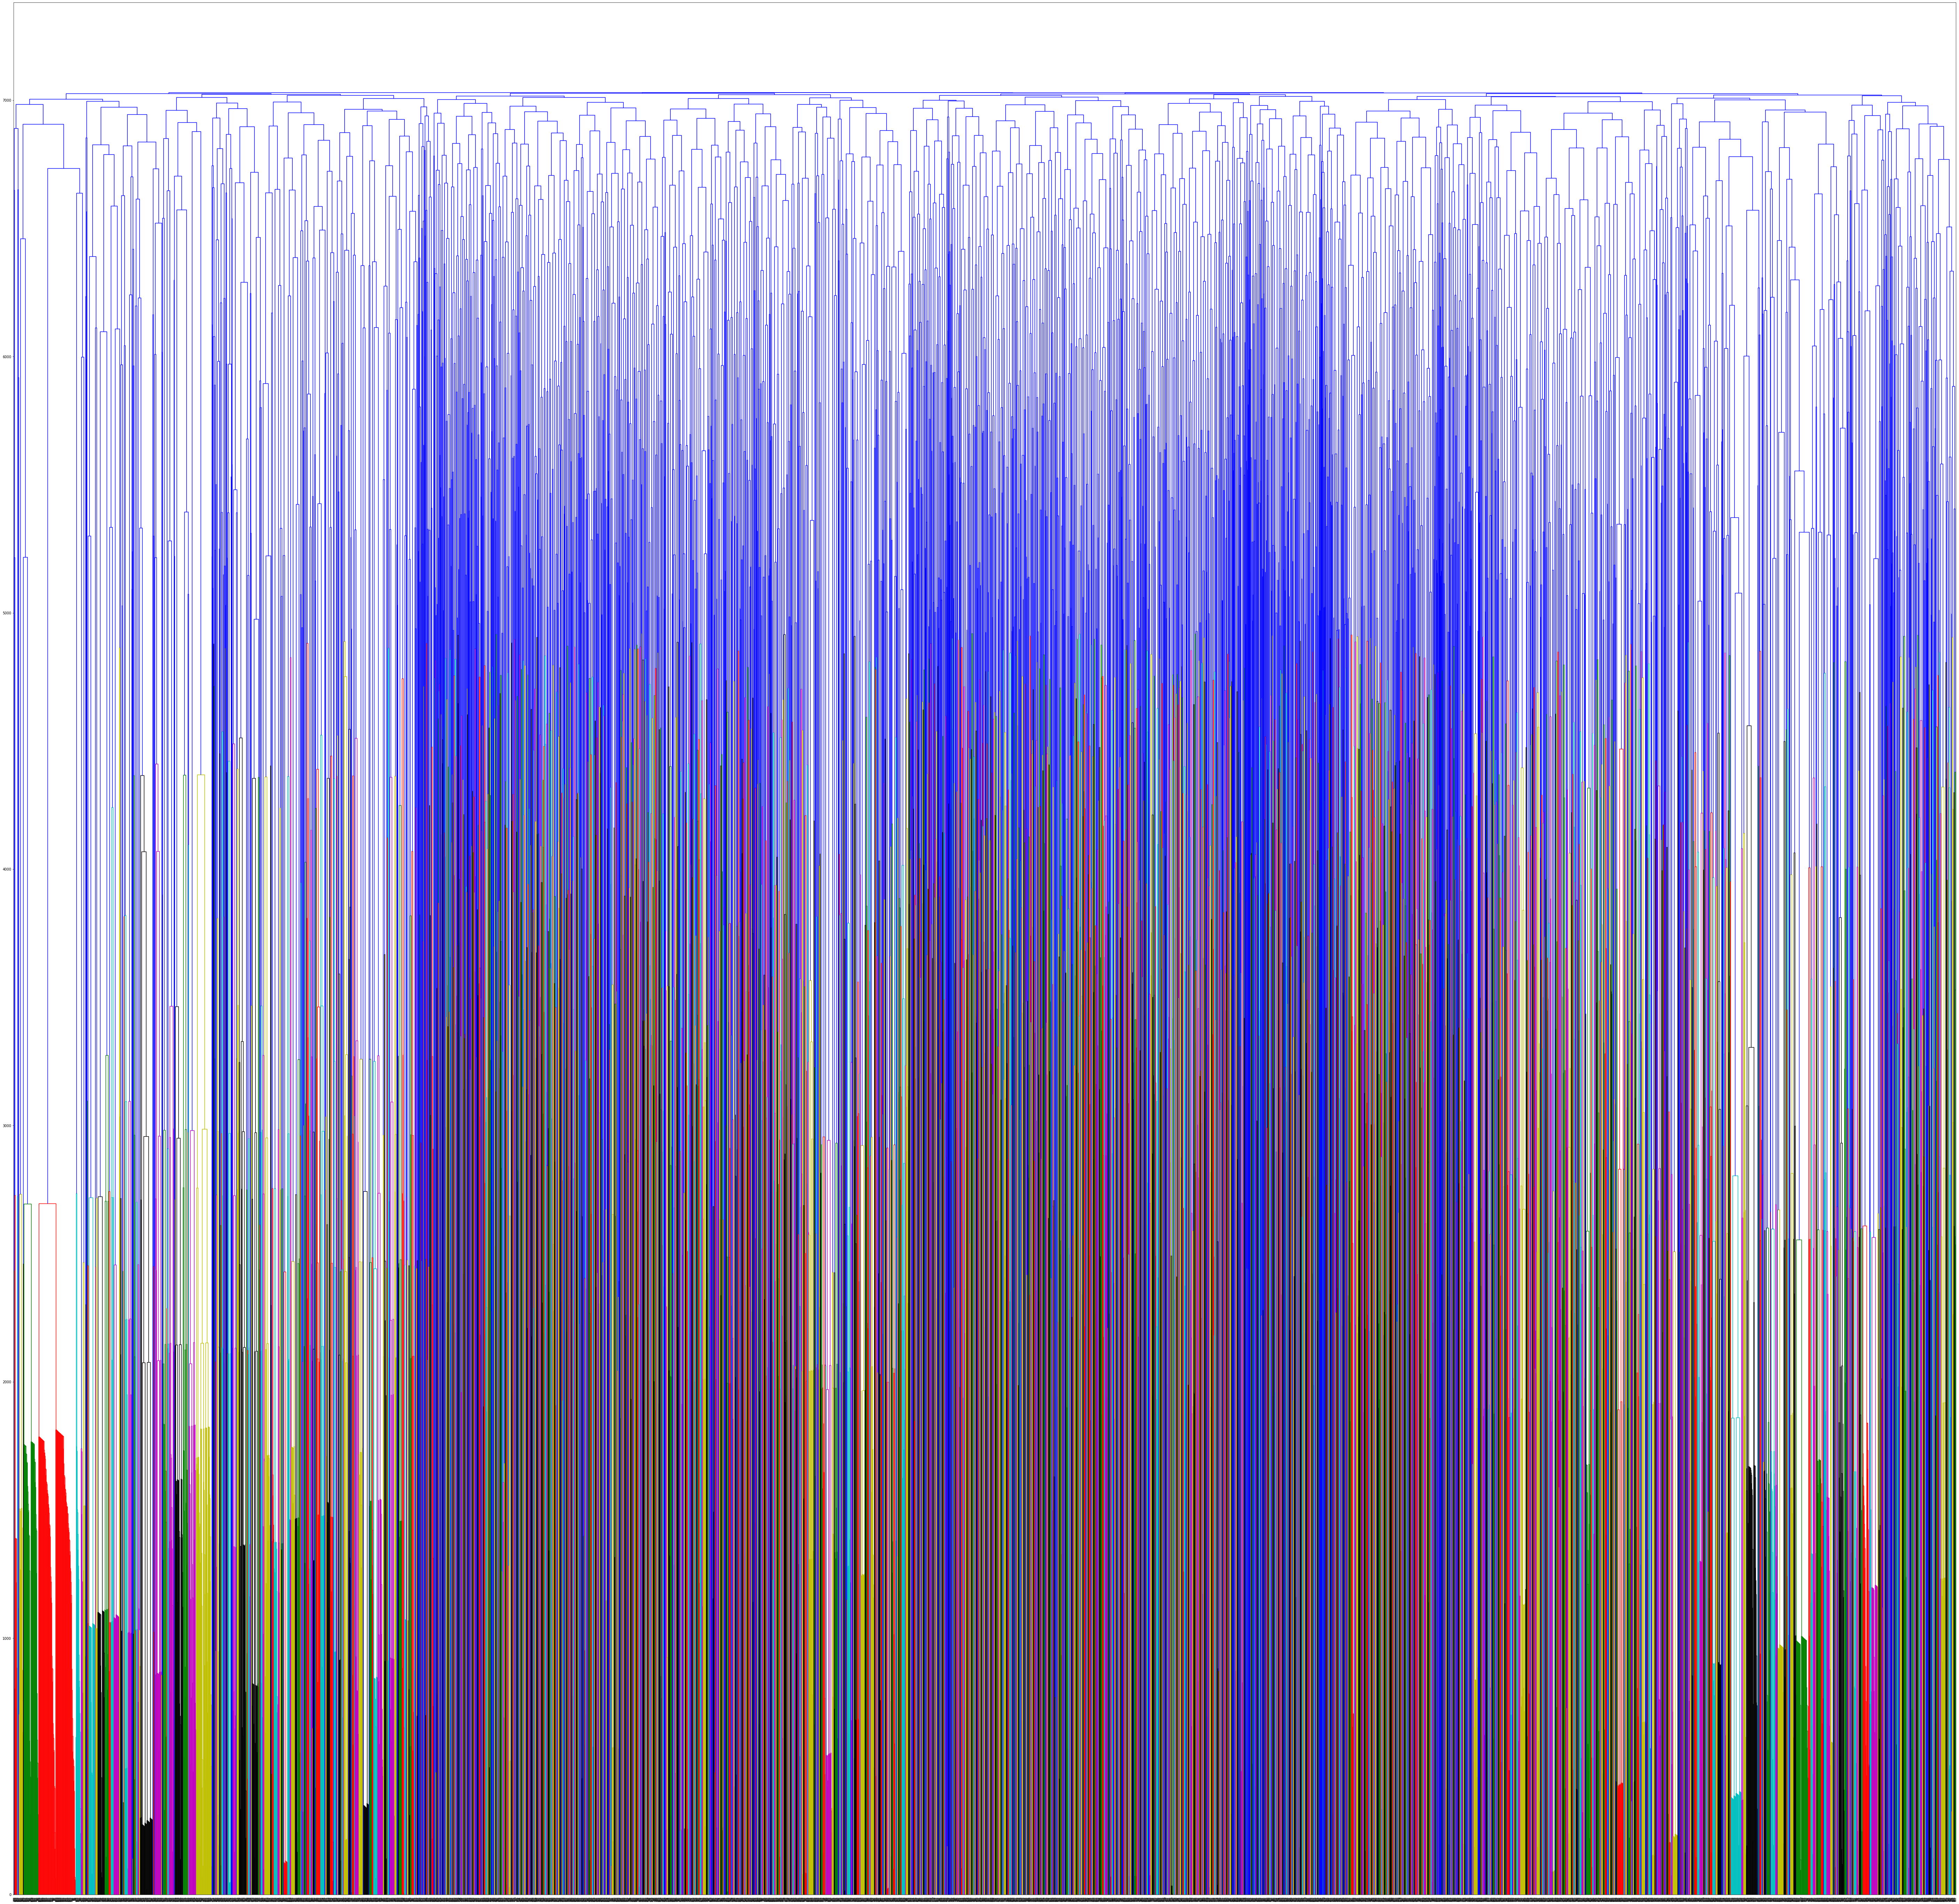

In [ ]:
plt.figure(figsize=(100,100))
plot_dendrogram(aggclus2d, truncate_mode=None, p=10)
plt.show()

## DBScan

In [ ]:
dbs2d = DBSCAN(eps=.25, min_samples=25, n_jobs=-1)
data_catd22['dbs_clus'] = dbs2d.fit_predict(mca_d2)
print(len(data_catd22.dbs_clus.value_counts()))
print(data_catd22.dbs_clus.value_counts())

2
0    5512
1    1520
Name: dbs_clus, dtype: int64


In [ ]:
pd.crosstab(y2, data_catd22['dbs_clus'])

dbs_clus     0     1
Churn               
No        3756  1407
Yes       1756   113

In [ ]:
clus_means13 = data_catd22.groupby(['dbs_clus', 'tenure']).gender.count().reset_index()
clus_means13

dbs_clus     tenure  gender
0         0       high     802
1         0        low    1948
2         0     medium     960
3         0  very-high    1802
4         1       high     227
5         1        low     591
6         1     medium     265
7         1  very-high     437

In [ ]:
clus_means14 = data_catd22.groupby(['dbs_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means14

dbs_clus MonthlyCharges  gender
0         0           high    2805
1         0            low     164
2         0         medium    1427
3         0      very-high    1116
4         1            low    1520

In [ ]:
clus_means15 = data_catd22.groupby(['dbs_clus', 'TotalCharges']).gender.count().reset_index()
clus_means15

dbs_clus TotalCharges  gender
0         0         high     690
1         0          low    1962
2         0       medium     906
3         0    very-high    1954
4         1          low    1159
5         1       medium     361

In [ ]:
fig = px.histogram(data_catd2, x=data_catd22['dbs_clus'], y=y2, color=y2)
fig.show()

In [ ]:
silmcdb = round(metrics.silhouette_score(mca_d2, data_catd22['dbs_clus'], metric='euclidean'),4)

In [ ]:
arsmcdb = round(metrics.adjusted_rand_score(y, data_catd22['dbs_clus']),4)

# Clustering data 2 w/ t-SNE Dimensionality Reduction


In [ ]:
# Creating dataframe copy to append t-SNE clustering results.
data_catd23 = data_catd2.copy()

In [ ]:
tsned22 = TSNE(
    n_components=20, 
    perplexity=10, 
    n_iter=1000, 
    verbose=10, 
    n_jobs=-1, 
    learning_rate=250,
    method='exact',
    random_state=2
)
tsne_d22 = pd.DataFrame(tsned22.fit_transform(X2), index=X2.index)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 1000 / 7032
[t-SNE] Computed conditional probabilities for sample 2000 / 7032
[t-SNE] Computed conditional probabilities for sample 3000 / 7032
[t-SNE] Computed conditional probabilities for sample 4000 / 7032
[t-SNE] Computed conditional probabilities for sample 5000 / 7032
[t-SNE] Computed conditional probabilities for sample 6000 / 7032
[t-SNE] Computed conditional probabilities for sample 7000 / 7032
[t-SNE] Computed conditional probabilities for sample 7032 / 7032
[t-SNE] Mean sigma: 0.000000
[t-SNE] Iteration 50: error = 104.0542795, gradient norm = 0.0160436 (50 iterations in 345.386s)
[t-SNE] Iteration 100: error = 90.0213080, gradient norm = 0.0006486 (50 iterations in 361.031s)
[t-SNE] Iteration 150: error = 89.2771882, gradient norm = 0.0002521 (50 iterations in 357.799s)
[t-SNE] Iteration 200: error = 89.0780552, gradient norm = 0.0001529 (50 iterations in 357.586s)
[t-SNE] Iterati

## Kmean

In [ ]:
kmeansd2 = KMeans(n_clusters=4, random_state=2)
data_catd23['kmean_clus'] = kmeansd2.fit_predict(tsne_d22)
data_catd23.kmean_clus.value_counts()

1    2215
0    1830
2    1521
3    1466
Name: kmean_clus, dtype: int64

In [ ]:
kmean_predd2 = kmeansd2.predict(tsne_d22)
pd.crosstab(y2, kmean_predd2)

col_0     0     1    2     3
Churn                       
No     1593  1935  580  1055
Yes     237   280  941   411

In [ ]:
clus_means16 = data_catd23.groupby(['kmean_clus', 'tenure']).gender.count().reset_index()
clus_means16

kmean_clus     tenure  gender
0            0       high     328
1            0        low     599
2            0     medium     585
3            0  very-high     318
4            1       high     380
5            1        low      14
6            1     medium      78
7            1  very-high    1743
8            2       high     136
9            2        low    1103
10           2     medium     272
11           2  very-high      10
12           3       high     185
13           3        low     823
14           3     medium     290
15           3  very-high     168

In [ ]:
clus_means17 = data_catd23.groupby(['kmean_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means17

kmean_clus MonthlyCharges  gender
0            0           high     354
1            0            low    1385
2            0         medium      90
3            0      very-high       1
4            1           high    1070
5            1            low     135
6            1         medium     158
7            1      very-high     852
8            2           high    1256
9            2         medium       2
10           2      very-high     263
11           3           high     125
12           3            low     164
13           3         medium    1177

In [ ]:
clus_means18 = data_catd23.groupby(['kmean_clus', 'TotalCharges']).gender.count().reset_index()
clus_means18

kmean_clus TotalCharges  gender
0            0         high     112
1            0          low    1162
2            0       medium     532
3            0    very-high      24
4            1         high     225
5            1          low       7
6            1       medium     185
7            1    very-high    1798
8            2         high     191
9            2          low     986
10           2       medium     271
11           2    very-high      73
12           3         high     162
13           3          low     966
14           3       medium     279
15           3    very-high      59

In [ ]:
fig = px.histogram(data_catd2, x=data_catd23['kmean_clus'], y=y2, color=y2)
fig.show()

In [ ]:
siltskm2 = round(metrics.silhouette_score(tsne_d22, data_catd23['kmean_clus'], metric='euclidean'),4)

In [ ]:
arstskm2 = round(metrics.adjusted_rand_score(y, data_catd23['kmean_clus']),4)

## Guassian Mixture

In [ ]:
gmmd2 = GaussianMixture(
    n_components=4, 
    init_params='random', 
    covariance_type='spherical', 
    verbose=1,
    random_state=2
)
data_catd23['gmm_clus'] = gmmd2.fit_predict(tsne_d22)
data_catd23.gmm_clus.value_counts()

Initialization 0
  Iteration 10
Initialization converged: True


2    2454
1    1822
0    1470
3    1286
Name: gmm_clus, dtype: int64

In [ ]:
gmm_predd2 = gmmd2.predict(tsne_d22)
pd.crosstab(y2, gmm_predd2)

col_0    0     1     2    3
Churn                      
No     561  1542  2165  895
Yes    909   280   289  391

In [ ]:
clus_means16 = data_catd23.groupby(['gmm_clus', 'tenure']).gender.count().reset_index()
clus_means16

gmm_clus     tenure  gender
0          0       high      77
1          0        low    1092
2          0     medium     296
3          0  very-high       5
4          1       high     339
5          1        low      15
6          1     medium      61
7          1  very-high    1407
8          2       high     477
9          2        low     609
10         2     medium     632
11         2  very-high     736
12         3       high     136
13         3        low     823
14         3     medium     236
15         3  very-high      91

In [ ]:
clus_means17 = data_catd23.groupby(['gmm_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means17

gmm_clus MonthlyCharges  gender
0          0           high    1243
1          0      very-high     227
2          1           high     872
3          1            low      35
4          1         medium      27
5          1      very-high     888
6          2           high     578
7          2            low    1487
8          2         medium     388
9          2      very-high       1
10         3           high     112
11         3            low     162
12         3         medium    1012

In [ ]:
clus_means18 = data_catd23.groupby(['gmm_clus', 'TotalCharges']).gender.count().reset_index()
clus_means18

gmm_clus TotalCharges  gender
0          0         high     157
1          0          low     978
2          0       medium     293
3          0    very-high      42
4          1         high     116
5          1          low       5
6          1       medium      74
7          1    very-high    1627
8          2         high     304
9          2          low    1180
10         2       medium     713
11         2    very-high     257
12         3         high     113
13         3          low     958
14         3       medium     187
15         3    very-high      28

In [ ]:
fig = px.histogram(data_catd2, x=data_catd23['gmm_clus'], y=y2, color=y2)
fig.show()

In [ ]:
siltsgm2 = round(metrics.silhouette_score(tsne_d22, data_catd23['gmm_clus'], metric='euclidean'),4)

In [ ]:
arstsgm2 = round(metrics.adjusted_rand_score(y, data_catd23['gmm_clus']),4)

## Mean Shift

In [ ]:
mshd2 = MeanShift(bandwidth=4.25, n_jobs=-1)
data_catd23['msh_clus'] = mshd2.fit_predict(tsne_d22)
data_catd23.msh_clus.value_counts()

0    3105
1    1560
2    1268
3    1011
5      60
4      28
Name: msh_clus, dtype: int64

In [ ]:
msh_predd2 = mshd2.predict(tsne_d22)
pd.crosstab(y2, msh_predd2)

col_0     0     1    2    3   4   5
Churn                              
No     2236  1181  845  851  27  23
Yes     869   379  423  160   1  37

In [ ]:
clus_means19 = data_catd23.groupby(['msh_clus', 'tenure']).gender.count().reset_index()
clus_means19

msh_clus     tenure  gender
0          0       high     477
1          0        low    1319
2          0     medium     827
3          0  very-high     482
4          1       high     256
5          1        low      89
6          1     medium     118
7          1  very-high    1097
8          2       high     116
9          2        low     902
10         2     medium     171
11         2  very-high      79
12         3       high     152
13         3        low     188
14         3     medium     105
15         3  very-high     566
16         4       high      11
17         4     medium       4
18         4  very-high      13
19         5       high      17
20         5        low      41
21         5  very-high       2

In [ ]:
clus_means20 = data_catd23.groupby(['msh_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means20

msh_clus MonthlyCharges  gender
0          0           high    1577
1          0            low    1437
2          0         medium      44
3          0      very-high      47
4          1           high     420
5          1            low      71
6          1         medium       3
7          1      very-high    1066
8          2           high     373
9          2            low      59
10         2         medium     836
11         3           high     367
12         3            low     117
13         3         medium     526
14         3      very-high       1
15         4           high      10
16         4         medium      18
17         5           high      58
18         5      very-high       2

In [ ]:
clus_means21 = data_catd23.groupby(['msh_clus', 'TotalCharges']).gender.count().reset_index()
clus_means21

msh_clus TotalCharges  gender
0          0         high     333
1          0          low    1791
2          0       medium     795
3          0    very-high     186
4          1         high      98
5          1          low      57
6          1       medium     138
7          1    very-high    1267
8          2         high     109
9          2          low     972
10         2       medium     154
11         2    very-high      33
12         3         high     131
13         3          low     262
14         3       medium     171
15         3    very-high     447
16         4         high       9
17         4       medium       7
18         4    very-high      12
19         5         high      10
20         5          low      39
21         5       medium       2
22         5    very-high       9

In [ ]:
fig = px.histogram(data_catd2, x=data_catd23['msh_clus'], y=y2, color=y2)
fig.show()

In [ ]:
siltsms2 = round(metrics.silhouette_score(tsne_d22, data_catd23['msh_clus'], metric='euclidean'),4)

In [ ]:
arstsms2 = round(metrics.adjusted_rand_score(y, data_catd23['msh_clus']),4)

## Agglomerative

In [ ]:
aggclusd2 = AgglomerativeClustering(n_clusters=4, linkage='complete')
data_catd23['agg_clus'] = aggclusd2.fit_predict(tsne_d22)
data_catd23.agg_clus.value_counts()

1    2918
0    2450
3     839
2     825
Name: agg_clus, dtype: int64

In [ ]:
pd.crosstab(y2, data_catd23['agg_clus'])

agg_clus     0     1    2    3
Churn                         
No        1894  2463  294  512
Yes        556   455  531  327

In [ ]:
clus_means22 = data_catd23.groupby(['agg_clus', 'tenure']).gender.count().reset_index()
clus_means22

agg_clus     tenure  gender
0          0       high     510
1          0        low     265
2          0     medium     302
3          0  very-high    1373
4          1       high     488
5          1        low     750
6          1     medium     831
7          1  very-high     849
8          2       high       1
9          2        low     815
10         2     medium       7
11         2  very-high       2
12         3       high      30
13         3        low     709
14         3     medium      85
15         3  very-high      15

In [ ]:
clus_means23 = data_catd23.groupby(['agg_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means23

agg_clus MonthlyCharges  gender
0          0           high     771
1          0            low     579
2          0         medium       8
3          0      very-high    1092
4          1           high    1158
5          1            low     941
6          1         medium     796
7          1      very-high      23
8          2           high     824
9          2      very-high       1
10         3           high      52
11         3            low     164
12         3         medium     623

In [ ]:
clus_means24 = data_catd23.groupby(['agg_clus', 'TotalCharges']).gender.count().reset_index()
clus_means24

agg_clus TotalCharges  gender
0          0         high     283
1          0          low     376
2          0       medium     488
3          0    very-high    1303
4          1         high     396
5          1          low    1186
6          1       medium     688
7          1    very-high     648
8          2         high       2
9          2          low     767
10         2       medium      54
11         2    very-high       2
12         3         high       9
13         3          low     792
14         3       medium      37
15         3    very-high       1

In [ ]:
fig = px.histogram(data_catd2, x=data_catd23['agg_clus'], y=y2, color=y2)
fig.show()

In [ ]:
siltsag2 = round(metrics.silhouette_score(tsne_d22, data_catd23['agg_clus'], metric='euclidean'),4)

In [ ]:
arstsag2 = round(metrics.adjusted_rand_score(y, data_catd23['agg_clus']),4)

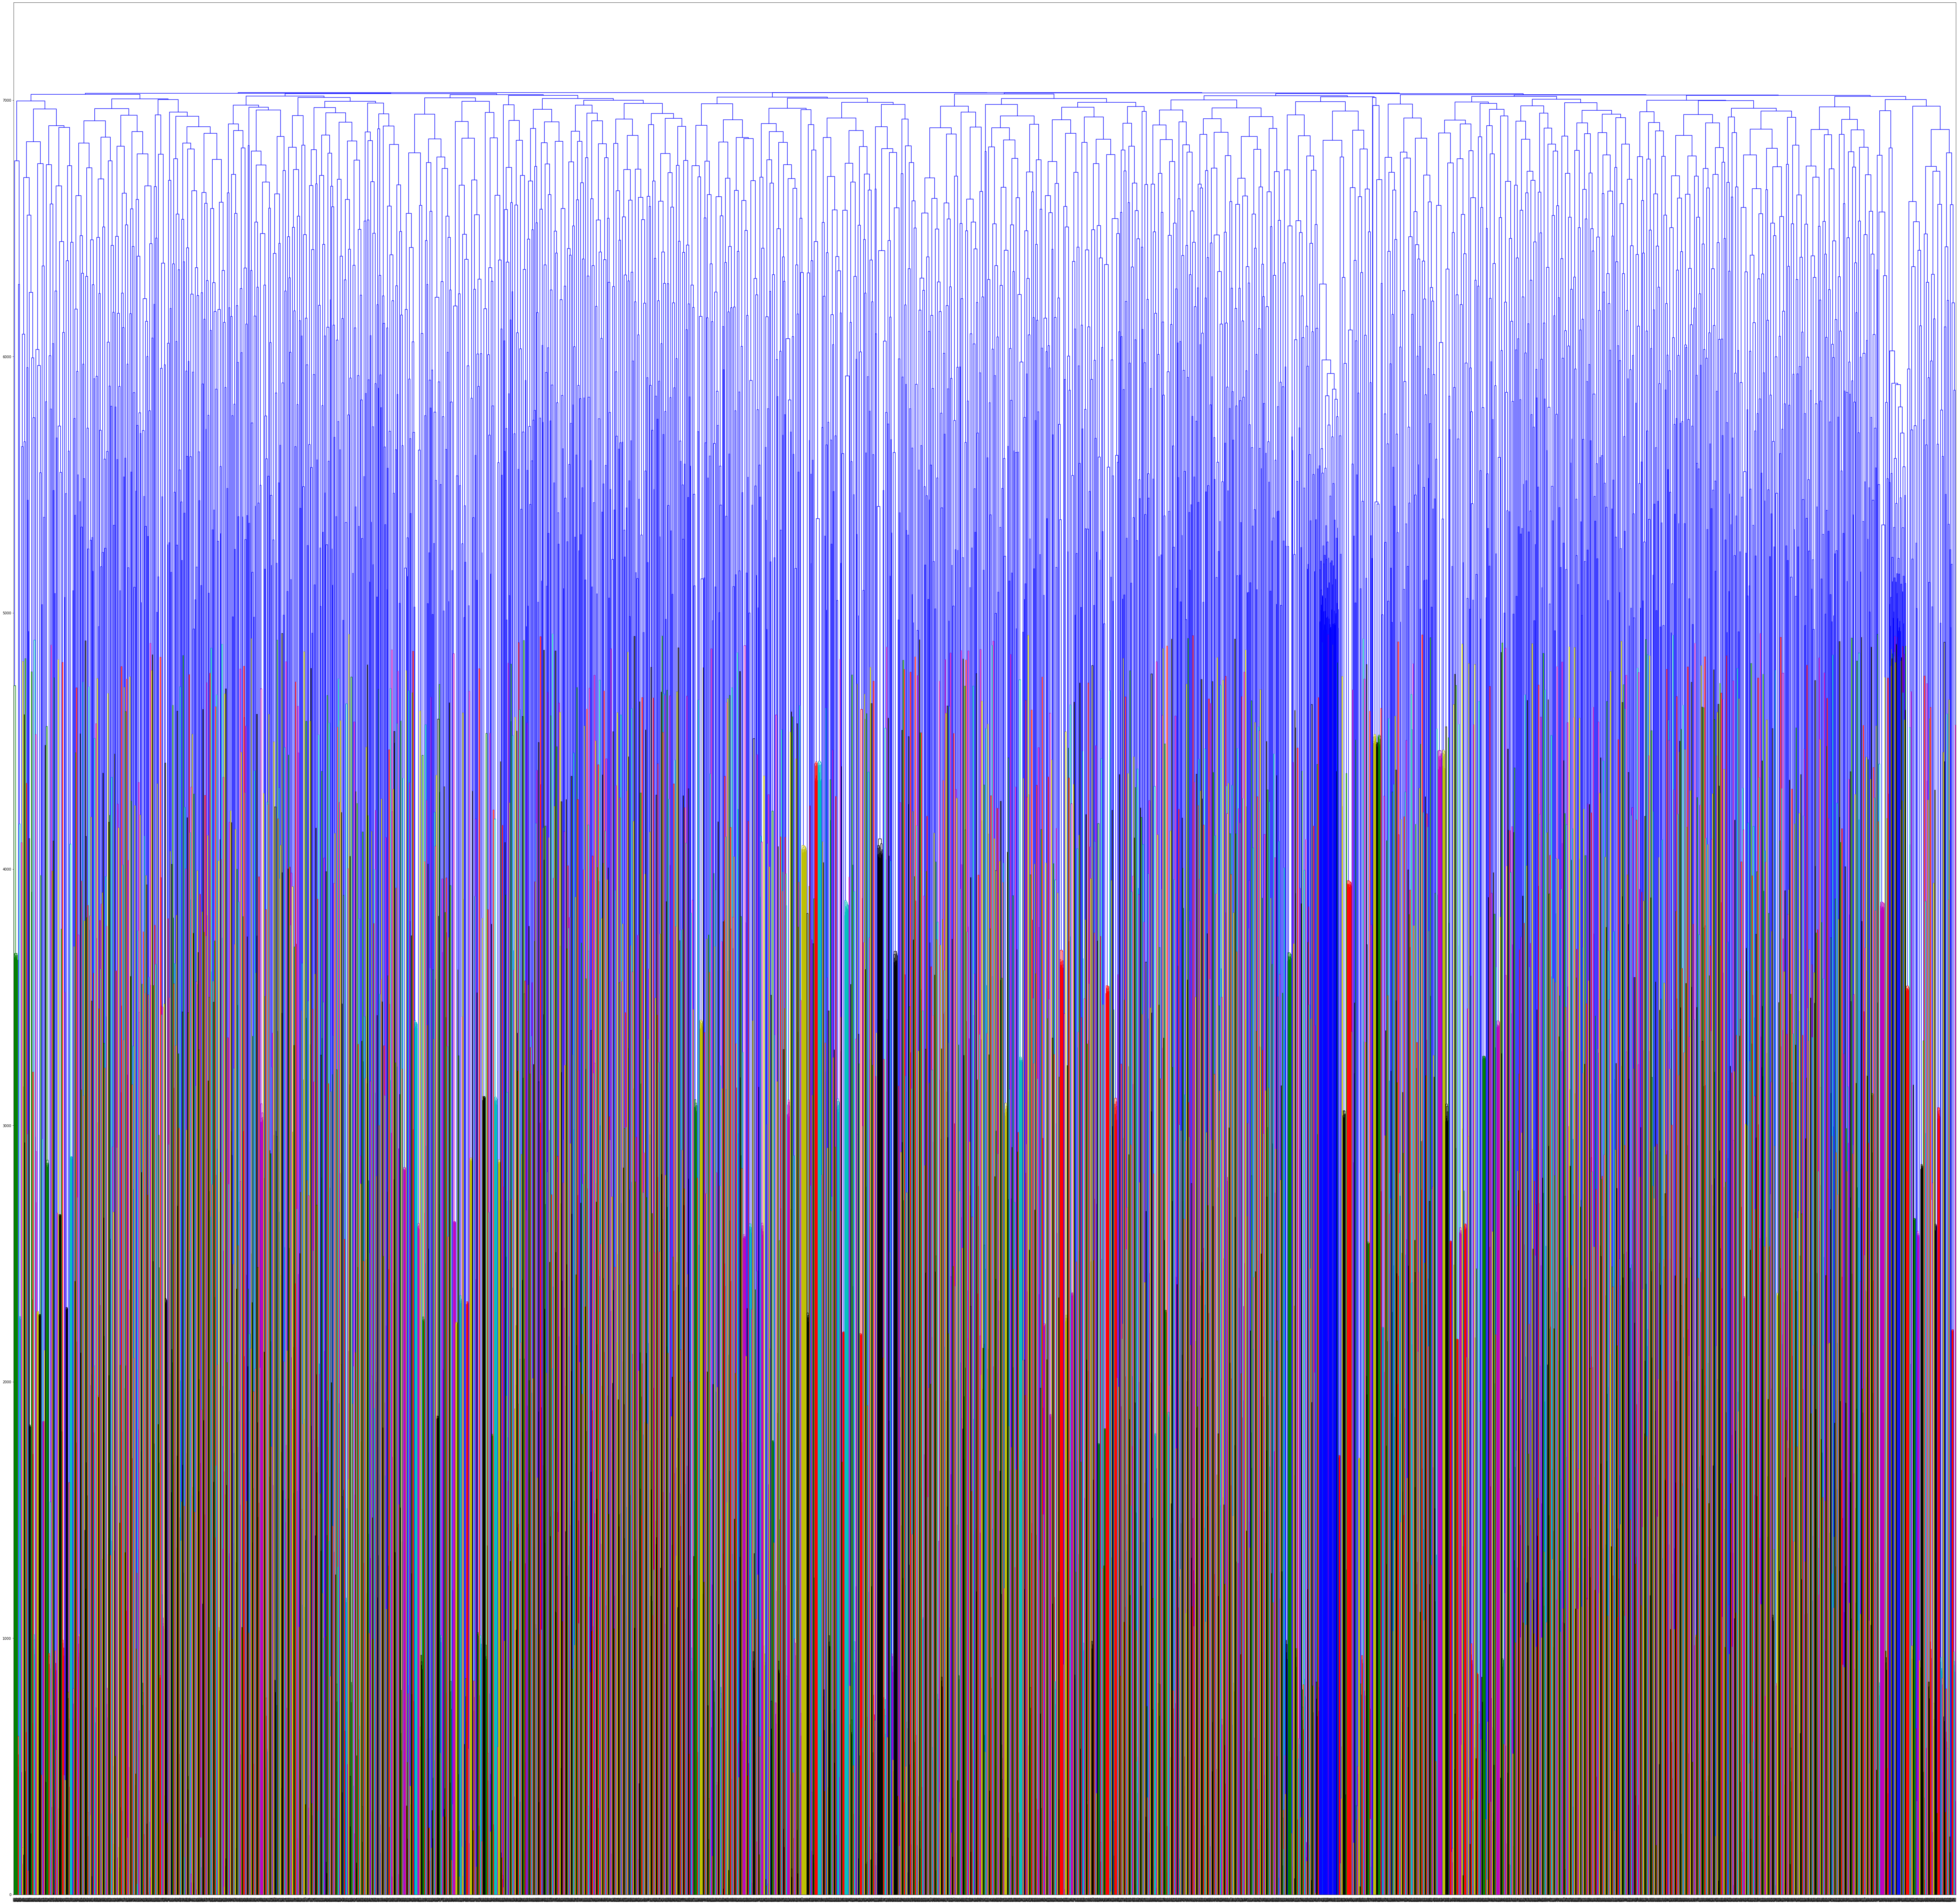

In [ ]:
plt.figure(figsize=(100,100))
plot_dendrogram(aggclusd2, truncate_mode=None, p=10)
plt.show()

## DBScan

In [ ]:
dbsd2 = DBSCAN(eps=3, min_samples=5, n_jobs=-1)
data_catd23['dbs_clus'] = dbsd2.fit_predict(tsne_d22)
print(len(data_catd23.dbs_clus.value_counts()))
print(data_catd23.dbs_clus.value_counts())

5
 0    5502
 1    1506
-1      14
 3       5
 2       5
Name: dbs_clus, dtype: int64


In [ ]:
pd.crosstab(y2, data_catd23['dbs_clus'])

dbs_clus  -1     0     1   2   3
Churn                           
No        10  3750  1393   5   5
Yes        4  1752   113   0   0

In [ ]:
clus_means25 = data_catd23.groupby(['dbs_clus', 'tenure']).gender.count().reset_index()
clus_means25

dbs_clus     tenure  gender
0         -1       high       2
1         -1        low       8
2         -1     medium       4
3          0       high     800
4          0        low    1944
5          0     medium     956
6          0  very-high    1802
7          1       high     227
8          1        low     582
9          1     medium     265
10         1  very-high     432
11         2        low       5
12         3  very-high       5

In [ ]:
clus_means26 = data_catd23.groupby(['dbs_clus', 'MonthlyCharges']).gender.count().reset_index()
clus_means26

dbs_clus MonthlyCharges  gender
0        -1           high      10
1        -1            low       4
2         0           high    2795
3         0            low     164
4         0         medium    1427
5         0      very-high    1116
6         1            low    1506
7         2            low       5
8         3            low       5

In [ ]:
clus_means27 = data_catd23.groupby(['dbs_clus', 'TotalCharges']).gender.count().reset_index()
clus_means27

dbs_clus TotalCharges  gender
0         -1          low       6
1         -1       medium       6
2         -1    very-high       2
3          0         high     690
4          0          low    1960
5          0       medium     900
6          0    very-high    1952
7          1          low    1145
8          1       medium     361
9          2          low       5
10         3          low       5

In [ ]:
fig = px.histogram(data_catd2, x=data_catd23['dbs_clus'], y=y2, color=y2)
fig.show()

In [ ]:
siltsdb2 = round(metrics.silhouette_score(tsne_d22, data_catd23['dbs_clus'], metric='euclidean'),4)

In [ ]:
arstsdb2 = round(metrics.adjusted_rand_score(y, data_catd23['dbs_clus']),4)

# Comparisons

In [ ]:
print('Data version 1: \n')
print('FAMD | t-SNE - Kmeans silhouette scores:        ', silfakm, ' | ', siltskm)
print('FAMD | t-SNE - Kmeans AR scores:                ', arsfakm, ' | ', arstskm)
print('FAMD | t-SNE - GMM silhouette scores:           ', silfagm, ' | ', siltsgm)
print('FAMD | t-SNE - GMM AR scores:                   ', arsfagm, ' | ', arstsgm)
print('FAMD | t-SNE - Mean Shift silhouette scores:    ', silfams, ' | ', siltsms)
print('FAMD | t-SNE - Mean Shift AR scores:            ', arsfams, ' |', arstsms)
print('FAMD | t-SNE - Agglomerative silhouette scores: ', silfaag, ' | ', siltsag)
print('FAMD | t-SNE - Agglomerative AR scores:         ', arsfaag, ' | ', arstsag)
print('FAMD | t-SNE - DBscan silhouette scores:        ', silfadb, ' | ', siltsdb)
print('FAMD | t-SNE - DBScan AR scores:                ', arsfadb, ' |', arstsdb)


Data version 1: 

FAMD | t-SNE - Kmeans silhouette scores:         0.3056  |  0.1525
FAMD | t-SNE - Kmeans AR scores:                 0.0252  |  0.0901
FAMD | t-SNE - GMM silhouette scores:            0.3034  |  0.1542
FAMD | t-SNE - GMM AR scores:                    0.0328  |  0.0444
FAMD | t-SNE - Mean Shift silhouette scores:     0.3021  |  0.0597
FAMD | t-SNE - Mean Shift AR scores:             0.0251  | -0.0294
FAMD | t-SNE - Agglomerative silhouette scores:  0.2958  |  0.0698
FAMD | t-SNE - Agglomerative AR scores:          0.0263  |  0.0279
FAMD | t-SNE - DBscan silhouette scores:         0.1479  |  0.0693
FAMD | t-SNE - DBScan AR scores:                 0.0011  | -0.0718


In [ ]:
print('Data version 2: \n')
print('MCA | t-SNE - Kmeans silhouette scores:        ', silmckm, ' | ', siltskm2)
print('MCA | t-SNE - Kmeans AR scores:                ', arsmckm, ' | ', arstskm2)
print('MCA | t-SNE - GMM silhouette scores:           ', silmcgm, ' | ', siltsgm2)
print('MCA | t-SNE - GMM AR scores:                  ', arsmcgm, '  | ', arstsgm2)
print('MCA | t-SNE - Mean Shift silhouette scores:    ', silmcms, ' | ', siltsms2)
print('MCA | t-SNE - Mean Shift AR scores:           ', arsmcms, ' |', arstsms2)
print('MCA | t-SNE - Agglomerative silhouette scores: ', silmcag, ' | ', siltsag2)
print('MCA | t-SNE - Agglomerative AR scores:         ', arsmcag, ' | ', arstsag2)
print('MCA | t-SNE - DBscan silhouette scores:        ', silmcdb, ' |', siltsdb2)
print('MCA | t-SNE - DBScan AR scores:               ', arsmcdb, ' |', arstsdb2)

Data version 2: 

MCA | t-SNE - Kmeans silhouette scores:         0.5928  |  0.1658
MCA | t-SNE - Kmeans AR scores:                 0.0293  |  0.0851
MCA | t-SNE - GMM silhouette scores:            0.4316  |  0.1541
MCA | t-SNE - GMM AR scores:                   -0.073   |  0.0952
MCA | t-SNE - Mean Shift silhouette scores:     0.6825  |  0.059
MCA | t-SNE - Mean Shift AR scores:            -0.0653  | -0.0023
MCA | t-SNE - Agglomerative silhouette scores:  0.5843  |  0.0961
MCA | t-SNE - Agglomerative AR scores:          0.0329  |  0.0908
MCA | t-SNE - DBscan silhouette scores:         0.6825  | -0.0349
MCA | t-SNE - DBScan AR scores:                -0.0653  | -0.0657
